<a href="https://www.kaggle.com/code/purushothamann/pcos-diagnostic-analysis?scriptVersionId=129675017" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Libraries used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency

# 2. Data Acquisition
---



## 2.1 Download the data directly



DATA SOURCE : https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos/download?datasetVersionNumber=3

## 2.2 Code for converting the above downloaded data into a dataframe

In [2]:
import os;
os.listdir('/kaggle/input/polycystic-ovary-syndrome-pcos/')

['PCOS_data_without_infertility.xlsx', 'PCOS_infertility.csv']

In [3]:
pcos = pd.read_excel('/kaggle/input/polycystic-ovary-syndrome-pcos/PCOS_data_without_infertility.xlsx', sheet_name="Full_new") 

## 2.3 Confirm the data has been downloaded correctly by displaying the first 5 and last 5 records.

In [4]:
pcos.head() #first 5 records in the data set

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5,NaN
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7,NaN
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0,NaN
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5,NaN
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0,NaN


In [5]:
pcos.tail() #last 5 records in the data set

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
536,537.0,537.0,0.0,35.0,50.0,164.592,18.5,17.0,72.0,16.0,...,0.0,0.0,110.0,70.0,1.0,0.0,17.5,10.0,6.7,NaN
537,538.0,538.0,0.0,30.0,63.2,158.000,25.3,15.0,72.0,18.0,...,0.0,0.0,110.0,70.0,9.0,7.0,19.0,18.0,8.2,NaN
538,539.0,539.0,0.0,36.0,54.0,152.000,23.4,13.0,74.0,20.0,...,0.0,0.0,110.0,80.0,1.0,0.0,18.0,9.0,7.3,NaN
539,540.0,540.0,0.0,27.0,50.0,150.000,22.2,15.0,74.0,20.0,...,0.0,0.0,110.0,70.0,7.0,6.0,18.0,16.0,11.5,NaN
540,541.0,541.0,1.0,23.0,82.0,165.000,30.1,13.0,80.0,20.0,...,1.0,0.0,120.0,70.0,9.0,10.0,19.0,18.0,6.9,NaN


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [6]:
pcos.columns #column heading

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [7]:
pcos.describe(include='all').transpose() #statistical summary of the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sl. No,541.0,NaN,NaN,NaN,271.0,156.317519,1.0,136.0,271.0,406.0,541.0
Patient File No.,541.0,NaN,NaN,NaN,271.0,156.317519,1.0,136.0,271.0,406.0,541.0
PCOS (Y/N),541.0,NaN,NaN,NaN,0.327172,0.469615,0.0,0.0,0.0,1.0,1.0
Age (yrs),541.0,NaN,NaN,NaN,31.430684,5.411006,20.0,28.0,31.0,35.0,48.0
Weight (Kg),541.0,NaN,NaN,NaN,59.637153,11.028287,31.0,52.0,59.0,65.0,108.0
Height(Cm),541.0,NaN,NaN,NaN,156.484835,6.033545,137.0,152.0,156.0,160.0,180.0
BMI,541.0,NaN,NaN,NaN,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.9
Blood Group,541.0,NaN,NaN,NaN,13.802218,1.840812,11.0,13.0,14.0,15.0,18.0
Pulse rate(bpm),541.0,NaN,NaN,NaN,73.247689,4.430285,13.0,72.0,72.0,74.0,82.0
RR (breaths/min),541.0,NaN,NaN,NaN,19.243993,1.688629,16.0,18.0,18.0,20.0,28.0


In [8]:
pcos.info() #data type of the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    float64
 1   Patient File No.        541 non-null    float64
 2   PCOS (Y/N)              541 non-null    float64
 3    Age (yrs)              541 non-null    float64
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    float64
 8   Pulse rate(bpm)         541 non-null    float64
 9   RR (breaths/min)        541 non-null    float64
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    float64
 12  Cycle length(days)      541 non-null    float64
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    fl

In [9]:
pcos.size #size of the data set

24345

In [10]:
pcos.shape #shape of the dataset (Rows , columns)

(541, 45)

In [11]:
pcos.info #shape of the dataset (Row & columns)

<bound method DataFrame.info of      Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0       1.0               1.0         0.0        28.0         44.6   
1       2.0               2.0         0.0        36.0         65.0   
2       3.0               3.0         1.0        33.0         68.8   
3       4.0               4.0         0.0        37.0         65.0   
4       5.0               5.0         0.0        25.0         52.0   
..      ...               ...         ...         ...          ...   
536   537.0             537.0         0.0        35.0         50.0   
537   538.0             538.0         0.0        30.0         63.2   
538   539.0             539.0         0.0        36.0         54.0   
539   540.0             540.0         0.0        27.0         50.0   
540   541.0             541.0         1.0        23.0         82.0   

     Height(Cm)         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
0        152.000  19.300000         15.0       

In [12]:
pcos.isnull #null data

<bound method DataFrame.isnull of      Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0       1.0               1.0         0.0        28.0         44.6   
1       2.0               2.0         0.0        36.0         65.0   
2       3.0               3.0         1.0        33.0         68.8   
3       4.0               4.0         0.0        37.0         65.0   
4       5.0               5.0         0.0        25.0         52.0   
..      ...               ...         ...         ...          ...   
536   537.0             537.0         0.0        35.0         50.0   
537   538.0             538.0         0.0        30.0         63.2   
538   539.0             539.0         0.0        36.0         54.0   
539   540.0             540.0         0.0        27.0         50.0   
540   541.0             541.0         1.0        23.0         82.0   

     Height(Cm)         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
0        152.000  19.300000         15.0     

Description & Statistical summary from the data 

## 2.5 Observations from the above. 


The data set is 24345 in size, with 541 rows and 45 columns. The majority of the attributes in our data set are integers and floats. We can also see some object data types, but based on the data set, we can disregard the entire attribute because it contains no useful information for the analysis.

# 3. Data Preparation

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


In [13]:
pcos.duplicated() #Duplicate Data

0      False
1      False
2      False
3      False
4      False
       ...  
536    False
537    False
538    False
539    False
540    False
Length: 541, dtype: bool

In [14]:
pcos.duplicated().sum() #No Duplicate data found

0

In [15]:
pcos.isna().sum() #missing data

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [16]:
(pcos.isna().sum() > 0).values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True])

In [17]:
# drop the unnecessary columns
pcos =pcos.drop(['Sl. No', 'Patient File No.','Weight (Kg)',
       'Height(Cm) ','RR (breaths/min)', 'Cycle(R/I)',
       'Marraige Status (Yrs)','  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'AMH(ng/mL)', 'PRL(ng/mL)','PRG(ng/mL)', 'RBS(mg/dl)', 'hair growth(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Endometrium (mm)','Unnamed: 44','Vit D3 (ng/mL)'],axis=1)

In [18]:
pcos.columns #Updated dataframe (Pcos)

Index(['PCOS (Y/N)', ' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'Hb(g/dl)', 'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'Weight gain(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

In [19]:
num_columns=pcos.select_dtypes(exclude='object').columns

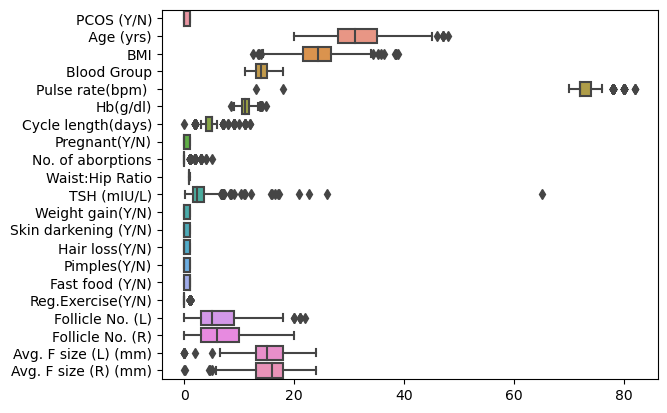

In [20]:
sns.boxplot(data=pcos.filter(num_columns), orient= "h")
plt.show()
plt.close()

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [21]:
pcos.duplicated().sum() #no duplicates.

0

In [22]:
mask = pcos.isna().any(axis=1)
print(mask)

0      False
1      False
2      False
3      False
4      False
       ...  
536    False
537    False
538    False
539    False
540    False
Length: 541, dtype: bool


In [23]:
indexes=mask.index[mask].tolist()
print(indexes)

[156]


In [24]:
pcos.drop([156, 458], inplace=True) #removed missing data 

In [25]:
pcos.shape

(539, 21)

In [26]:
pcos.isna().sum() #checking for missing data.

PCOS (Y/N)              0
 Age (yrs)              0
BMI                     0
Blood Group             0
Pulse rate(bpm)         0
Hb(g/dl)                0
Cycle length(days)      0
Pregnant(Y/N)           0
No. of aborptions       0
Waist:Hip Ratio         0
TSH (mIU/L)             0
Weight gain(Y/N)        0
Skin darkening (Y/N)    0
Hair loss(Y/N)          0
Pimples(Y/N)            0
Fast food (Y/N)         0
Reg.Exercise(Y/N)       0
Follicle No. (L)        0
Follicle No. (R)        0
Avg. F size (L) (mm)    0
Avg. F size (R) (mm)    0
dtype: int64

In [27]:
num_columns=pcos.select_dtypes(exclude='object').columns

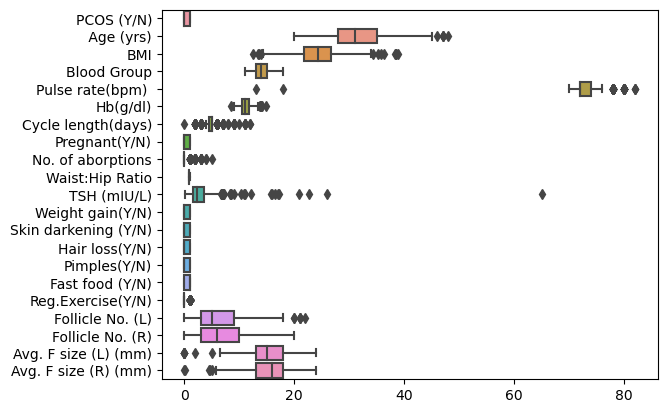

In [28]:
sns.boxplot(data=pcos.filter(num_columns), orient= "h")
plt.show()
plt.close()

In [29]:
pcos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PCOS (Y/N),539.0,0.326531,0.469380,0.000000,0.000000,0.000000,1.000000,1.000000
Age (yrs),539.0,31.430427,5.414105,20.000000,28.000000,31.000000,35.000000,48.000000
BMI,539.0,24.315408,4.061713,12.417882,21.674599,24.238227,26.650813,38.900000
Blood Group,539.0,13.801484,1.843182,11.000000,13.000000,14.000000,15.000000,18.000000
Pulse rate(bpm),539.0,73.252319,4.437858,13.000000,72.000000,72.000000,74.000000,82.000000
Hb(g/dl),539.0,11.161558,0.868019,8.500000,10.500000,11.000000,11.750000,14.800000
Cycle length(days),539.0,4.938776,1.491600,0.000000,4.500000,5.000000,5.000000,12.000000
Pregnant(Y/N),539.0,0.382189,0.486374,0.000000,0.000000,0.000000,1.000000,1.000000
No. of aborptions,539.0,0.289425,0.693638,0.000000,0.000000,0.000000,0.000000,5.000000
Waist:Hip Ratio,539.0,0.891841,0.046331,0.755556,0.857143,0.894737,0.928571,0.979167


In [30]:
iqr =pcos.describe(percentiles=[0.25, 0.75]).loc['75%'].subtract(pcos.describe(percentiles=[0.25, 0.75]).loc['25%'])
print(iqr)

PCOS (Y/N)              1.000000
 Age (yrs)              7.000000
BMI                     4.976214
Blood Group             2.000000
Pulse rate(bpm)         2.000000
Hb(g/dl)                1.250000
Cycle length(days)      0.500000
Pregnant(Y/N)           1.000000
No. of aborptions       0.000000
Waist:Hip Ratio         0.071429
TSH (mIU/L)             2.090000
Weight gain(Y/N)        1.000000
Skin darkening (Y/N)    1.000000
Hair loss(Y/N)          1.000000
Pimples(Y/N)            1.000000
Fast food (Y/N)         1.000000
Reg.Exercise(Y/N)       0.000000
Follicle No. (L)        6.000000
Follicle No. (R)        7.000000
Avg. F size (L) (mm)    5.000000
Avg. F size (R) (mm)    5.000000
dtype: float64


## 3.3 Encode categorical data

## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

## 3.4 Report

Duplicate Data:
    There is no duplicate data in the data set so ignoring this part.
Missing Data:
    Indexes 156, 458 had missing data, they're missing completely at random (MCAR), and it very minimal and satisfied the conditon to remove the data from the data set. So we removed the indexes completely.
Data inconsistencies:
    The data set is consistent throughout, so we ignored this part.

## 3.5 Target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations


our target variable is pcos, but it is already encoded so we'll move on to data visualization.

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

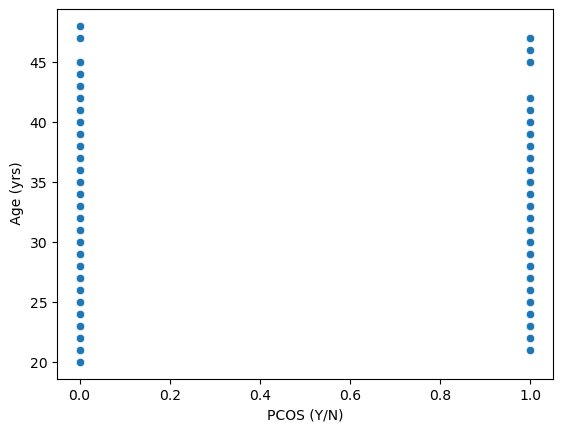

In [31]:
sns.scatterplot(x='PCOS (Y/N)', y=' Age (yrs)', data=pcos)
plt.show()
plt.close()

We have two cases, one with pcos and one without pcos, a scatter plot cannot provide enough information for this analysis, so we are plotting a relationship matrix, which clearly shows the relationship between the attributes.

Text(0.5, 0, 'PCOS (Y/N)')

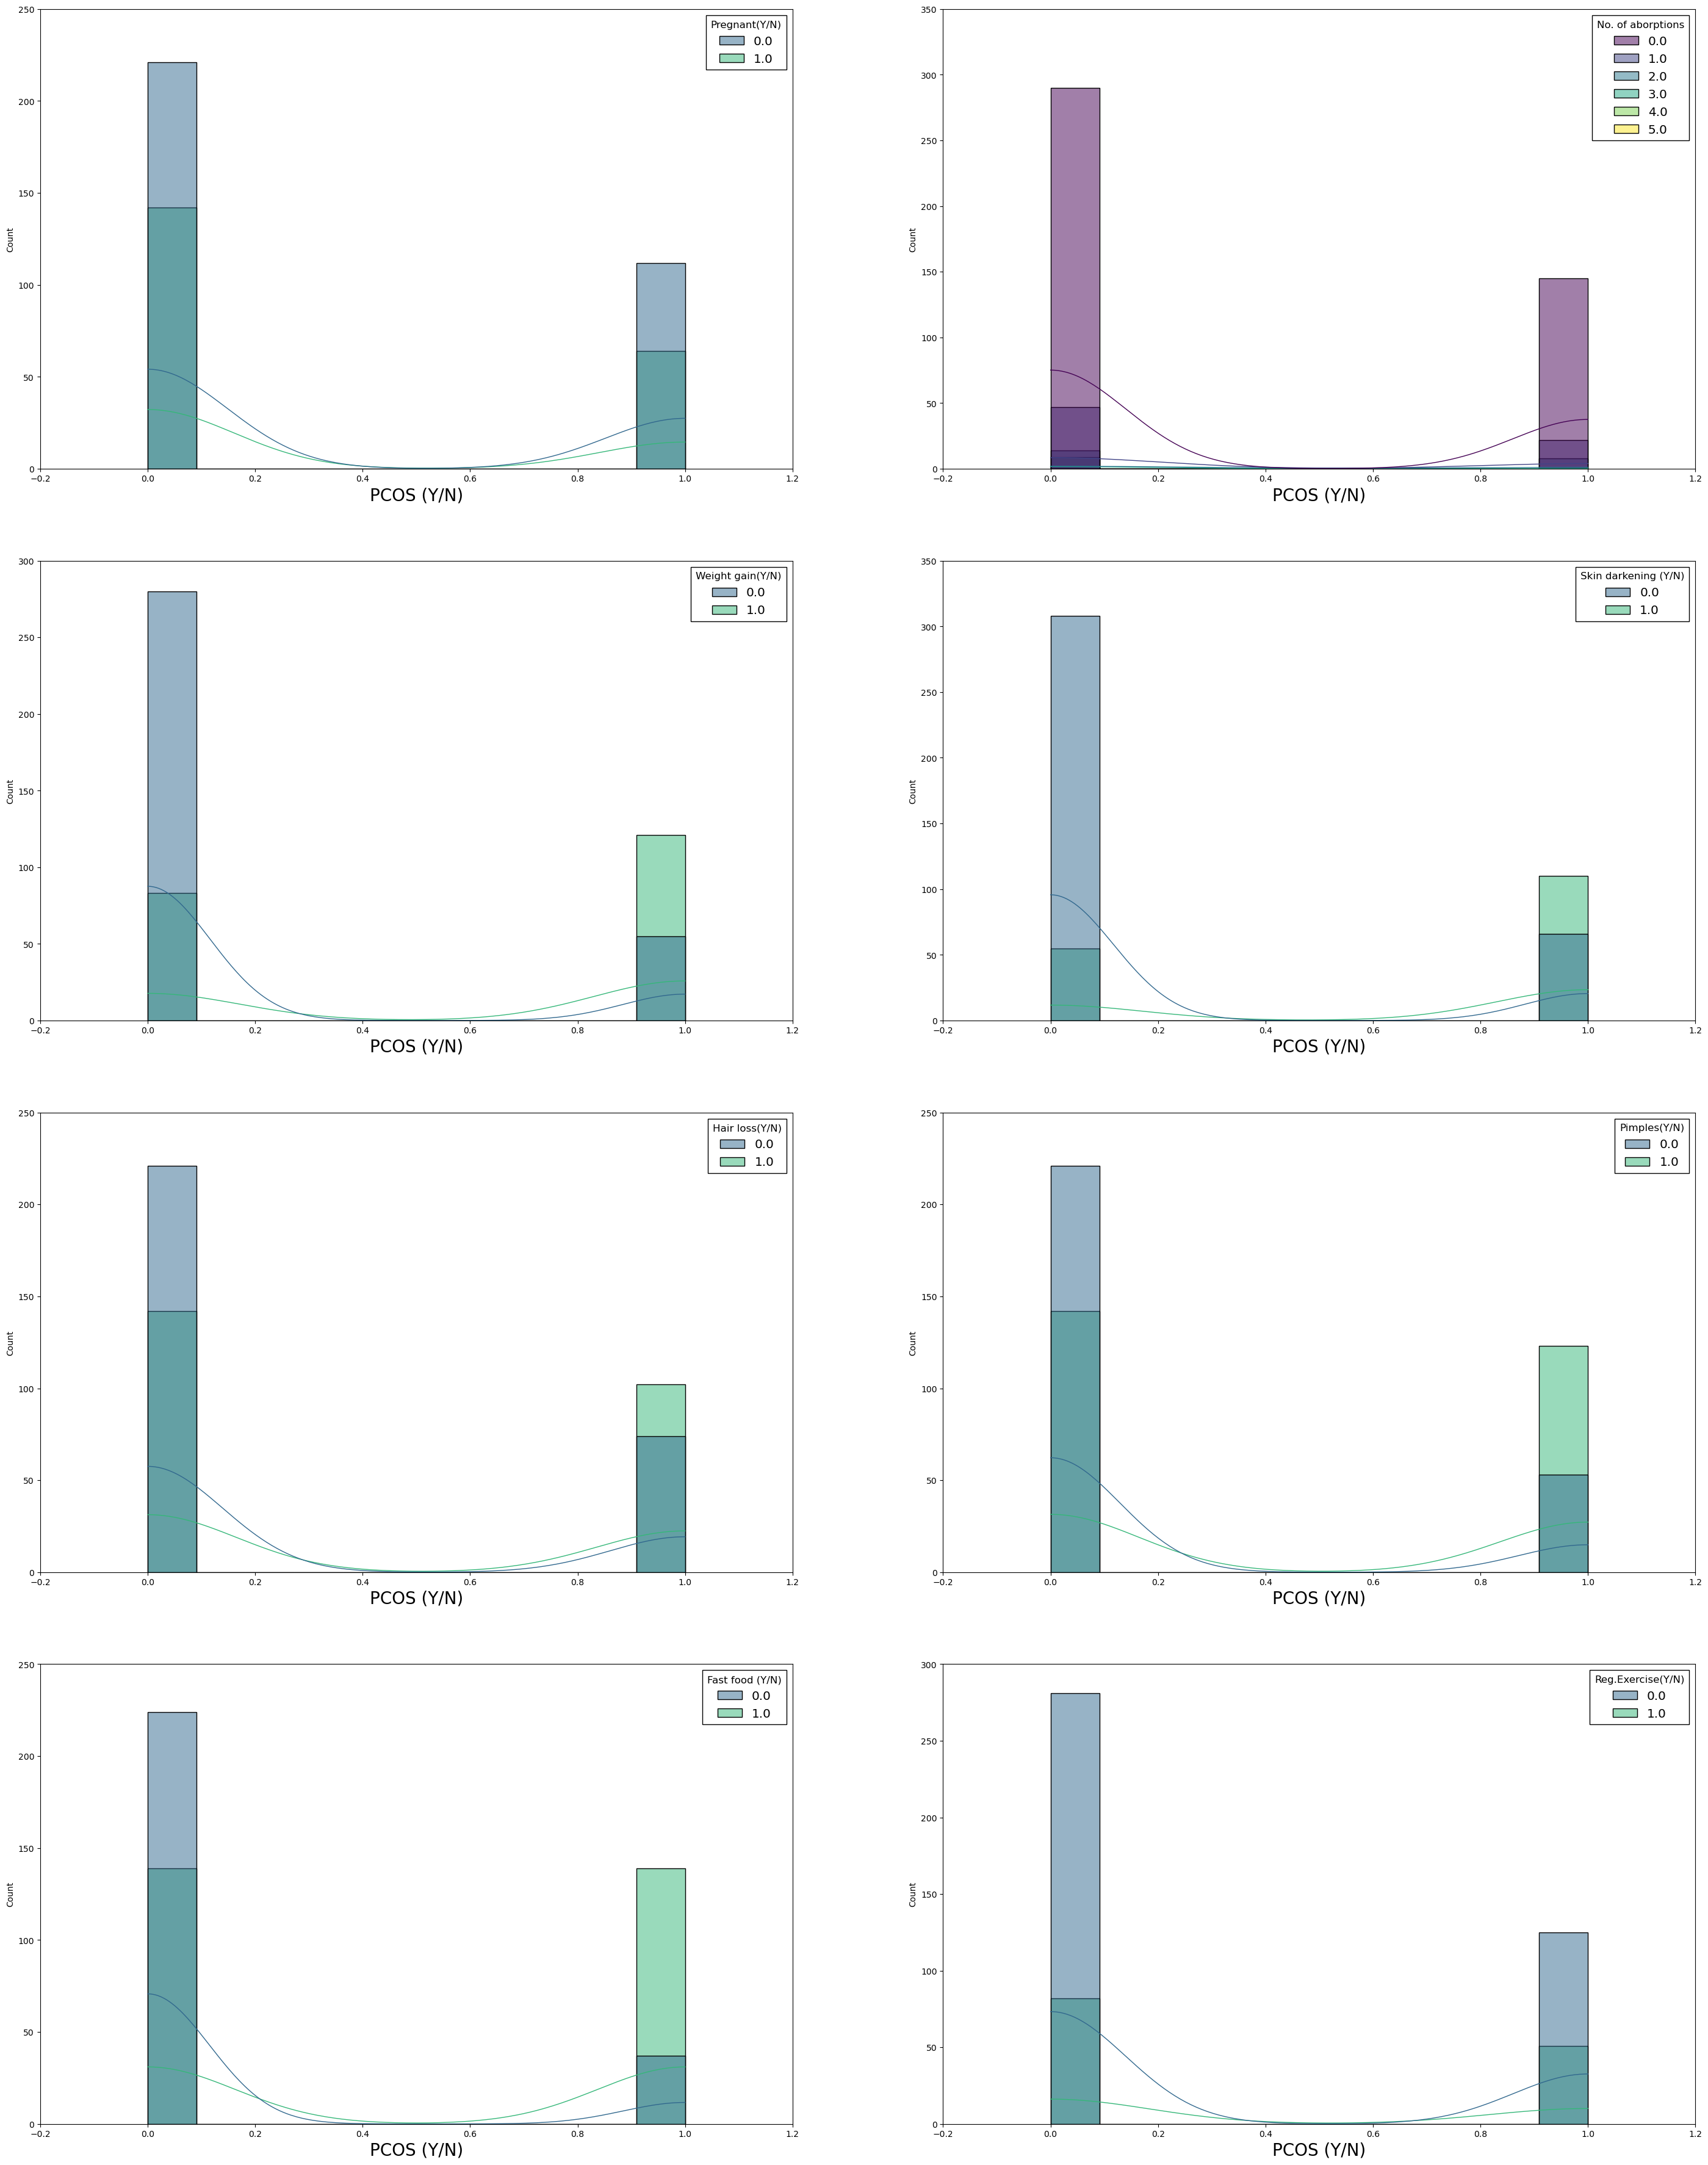

In [32]:
fig, ax = plt.subplots(4,2, figsize=(35,45))
plt.style.use("classic")

sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Pregnant(Y/N)'], palette="viridis", kde=True, ax=ax[0,0])
ax[0,0].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['No. of aborptions'], palette="viridis", kde=True, ax=ax[0,1])
ax[0,1].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Weight gain(Y/N)'], palette="viridis", kde=True, ax=ax[1,0])
ax[1,0].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Skin darkening (Y/N)'], palette="viridis", kde=True, ax=ax[1,1])
ax[1,1].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Hair loss(Y/N)'], palette="viridis", kde=True, ax=ax[2,0])
ax[2,0].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Pimples(Y/N)'], palette="viridis", kde=True, ax=ax[2,1])
ax[2,1].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Fast food (Y/N)'], palette="viridis", kde=True, ax=ax[3,0])
ax[3,0].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Reg.Exercise(Y/N)'], palette="viridis", kde=True, ax=ax[3,1])
ax[3,1].set_xlabel('PCOS (Y/N)',fontsize=20)

In [33]:
pcos.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'Hb(g/dl)', 'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'Weight gain(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

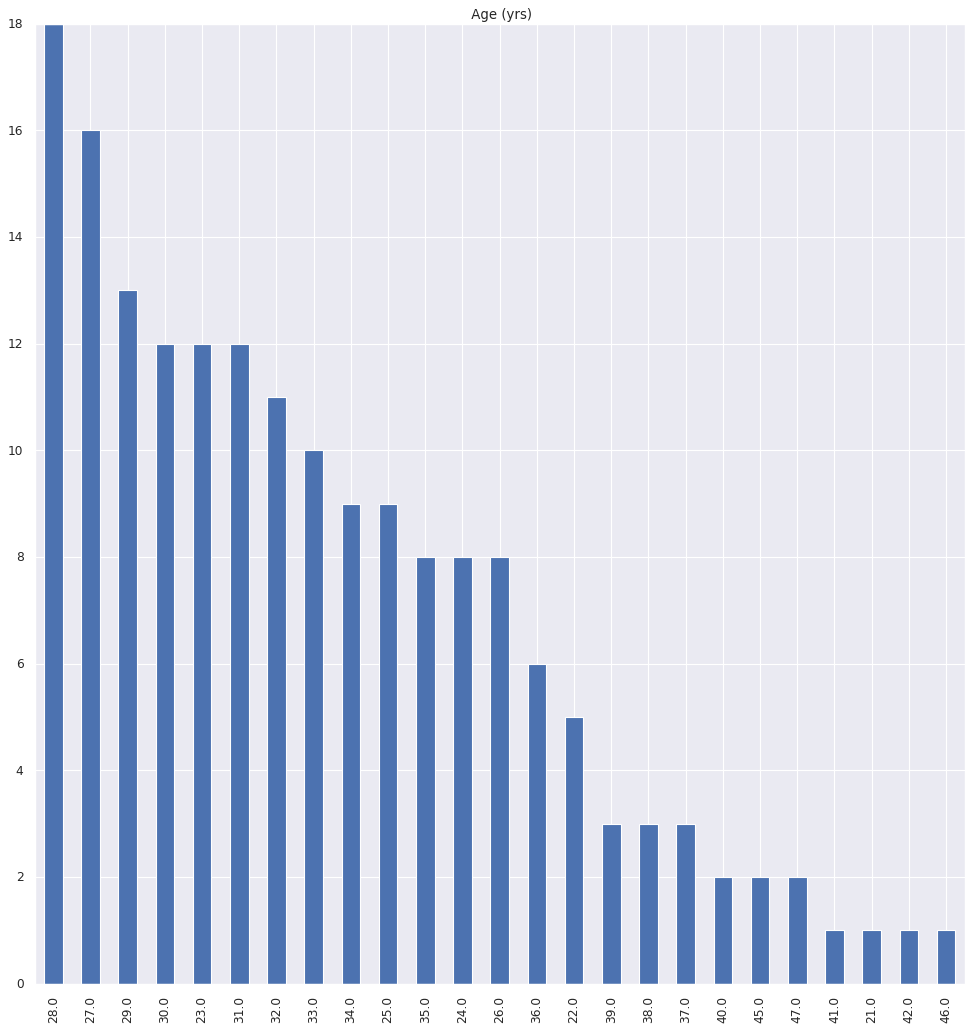

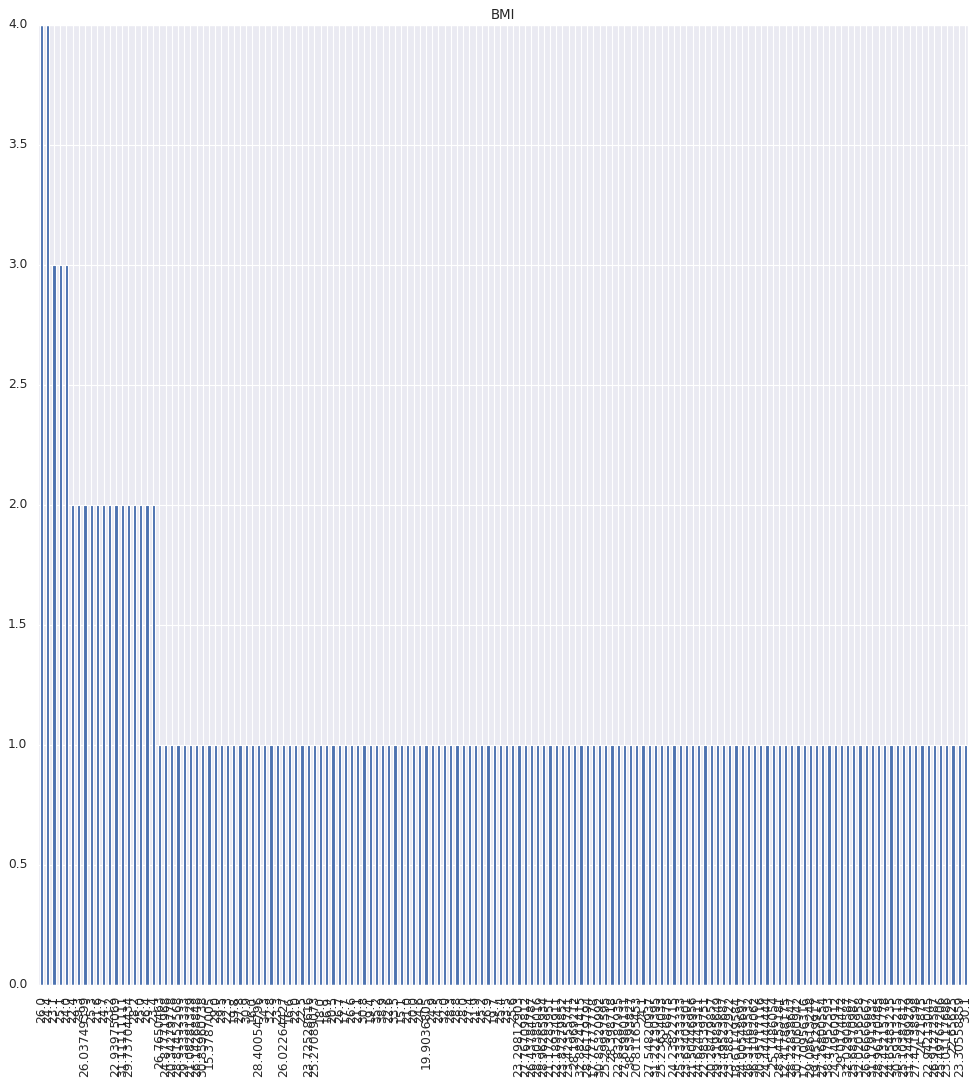

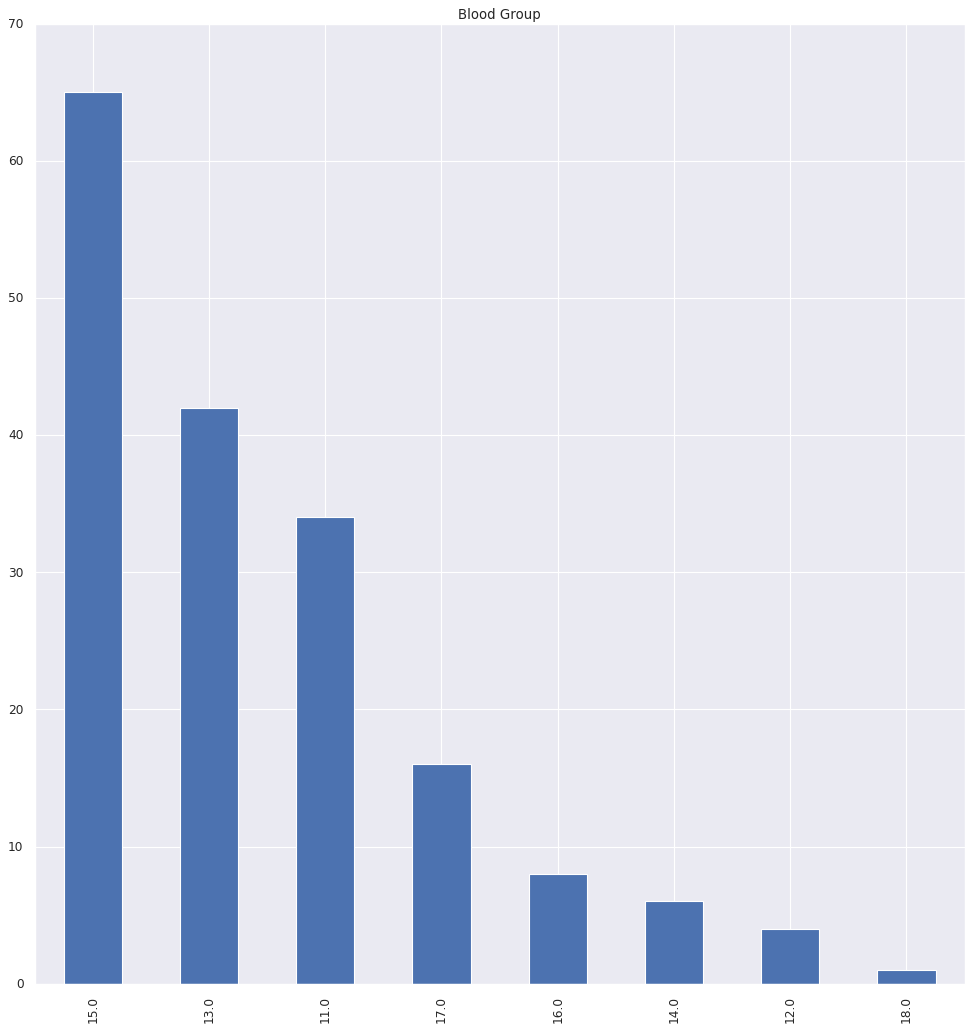

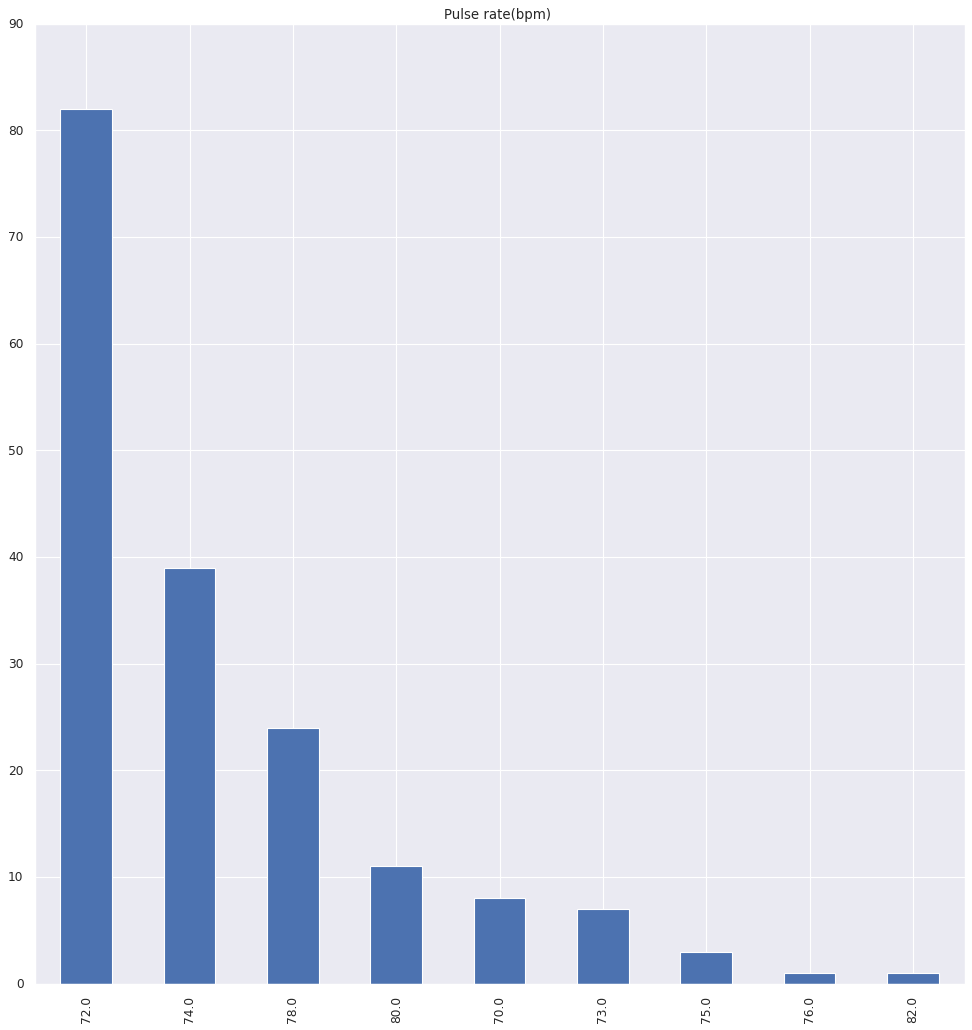

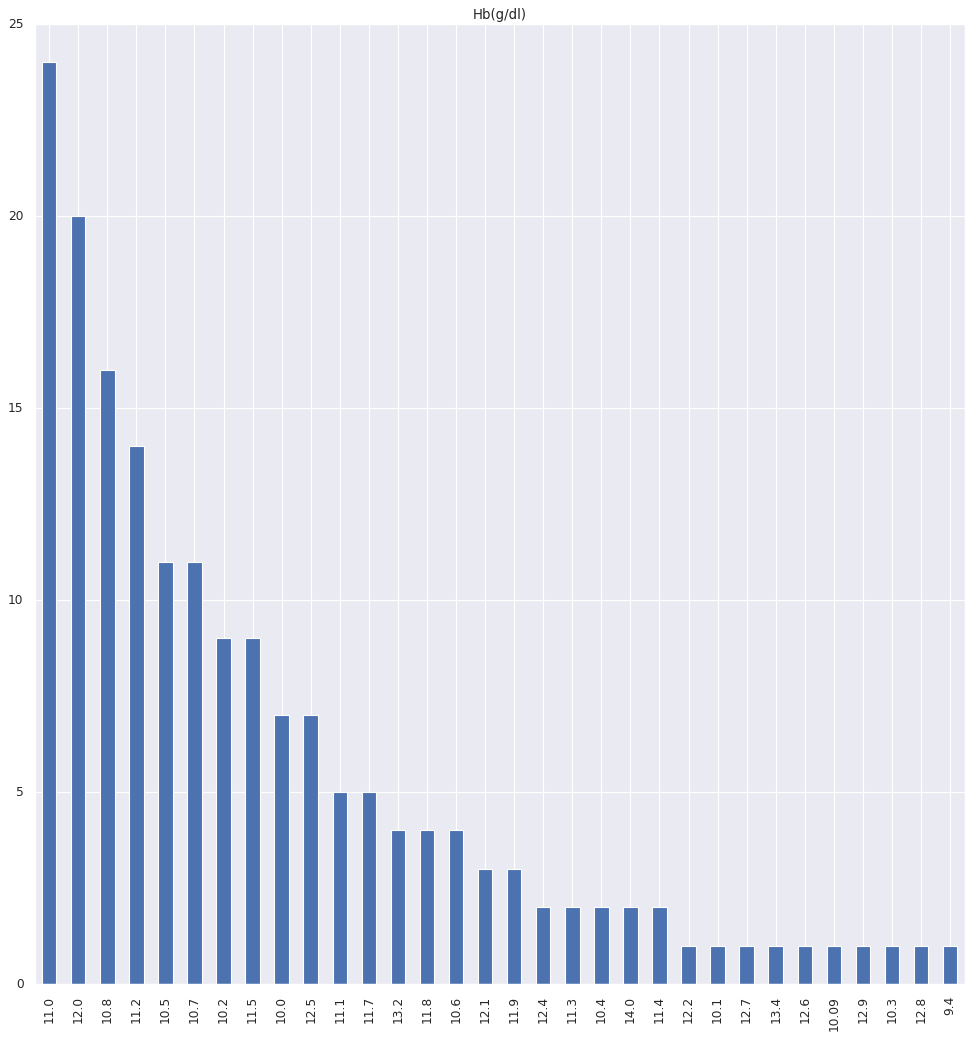

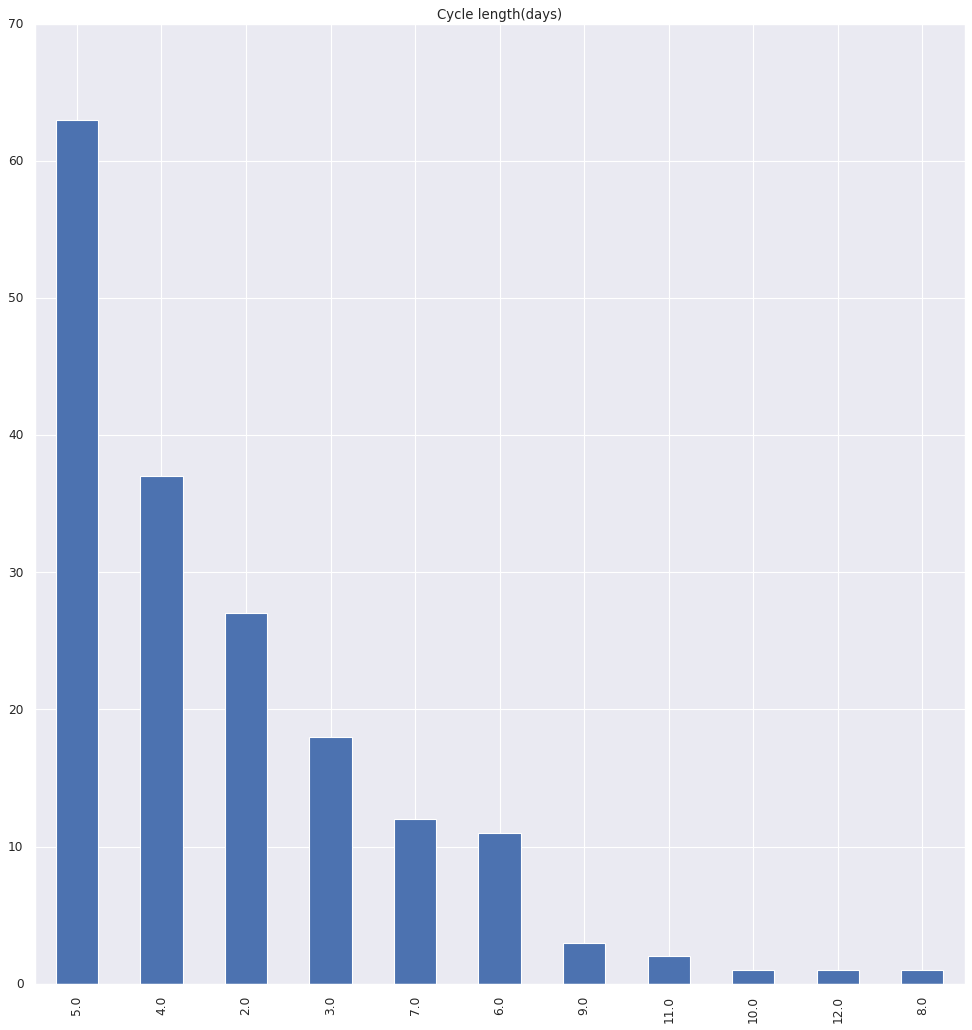

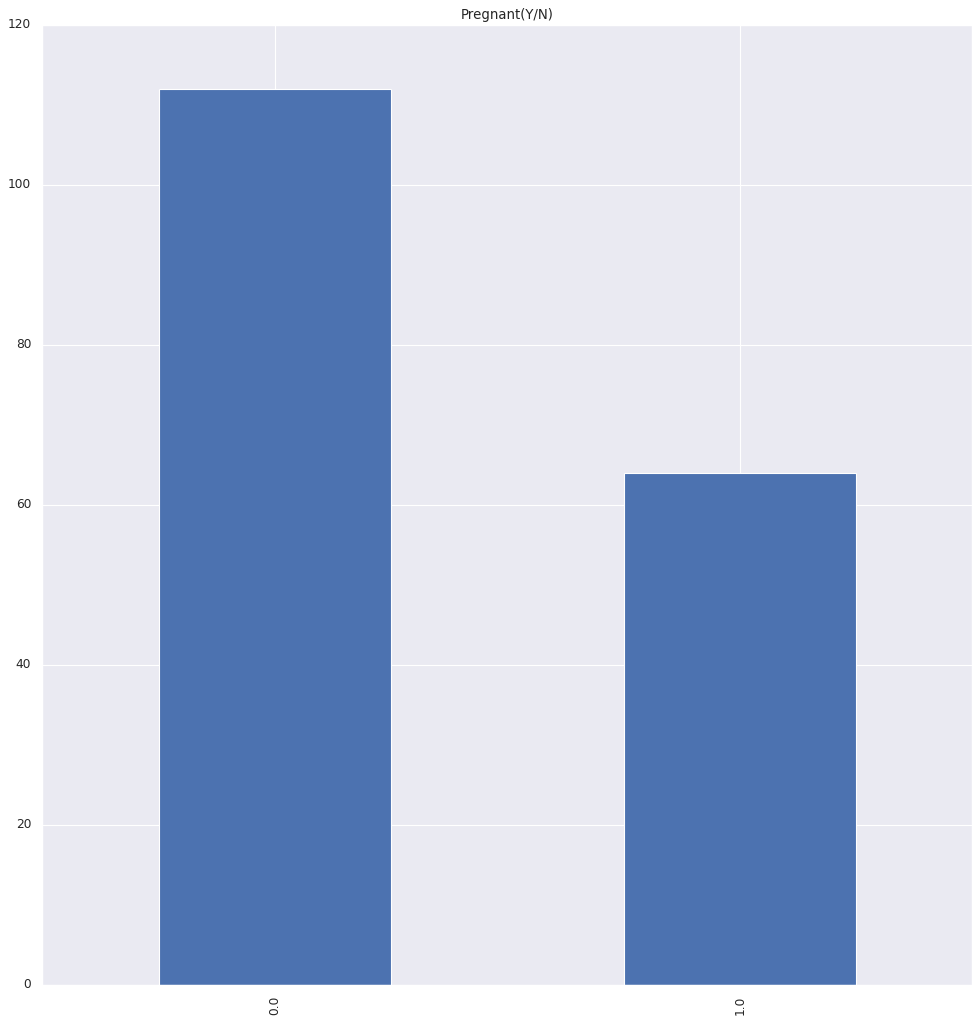

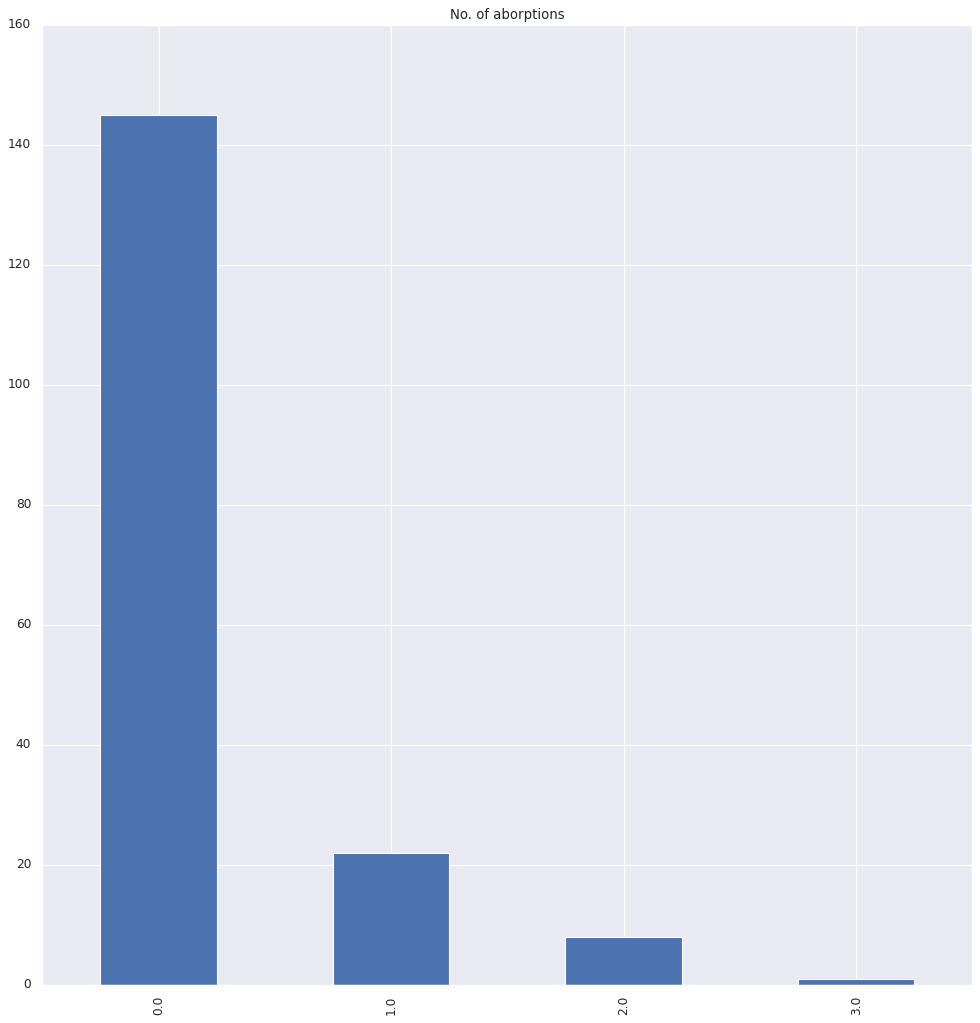

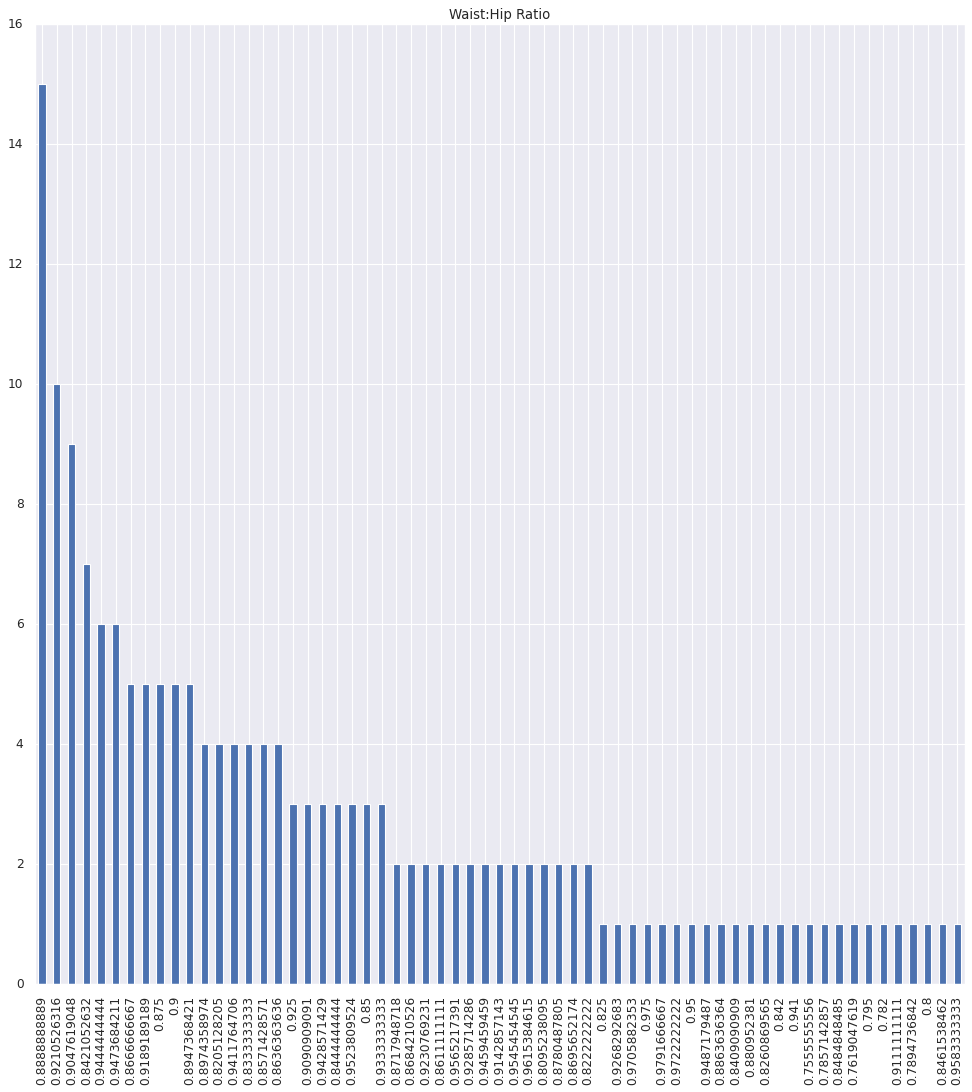

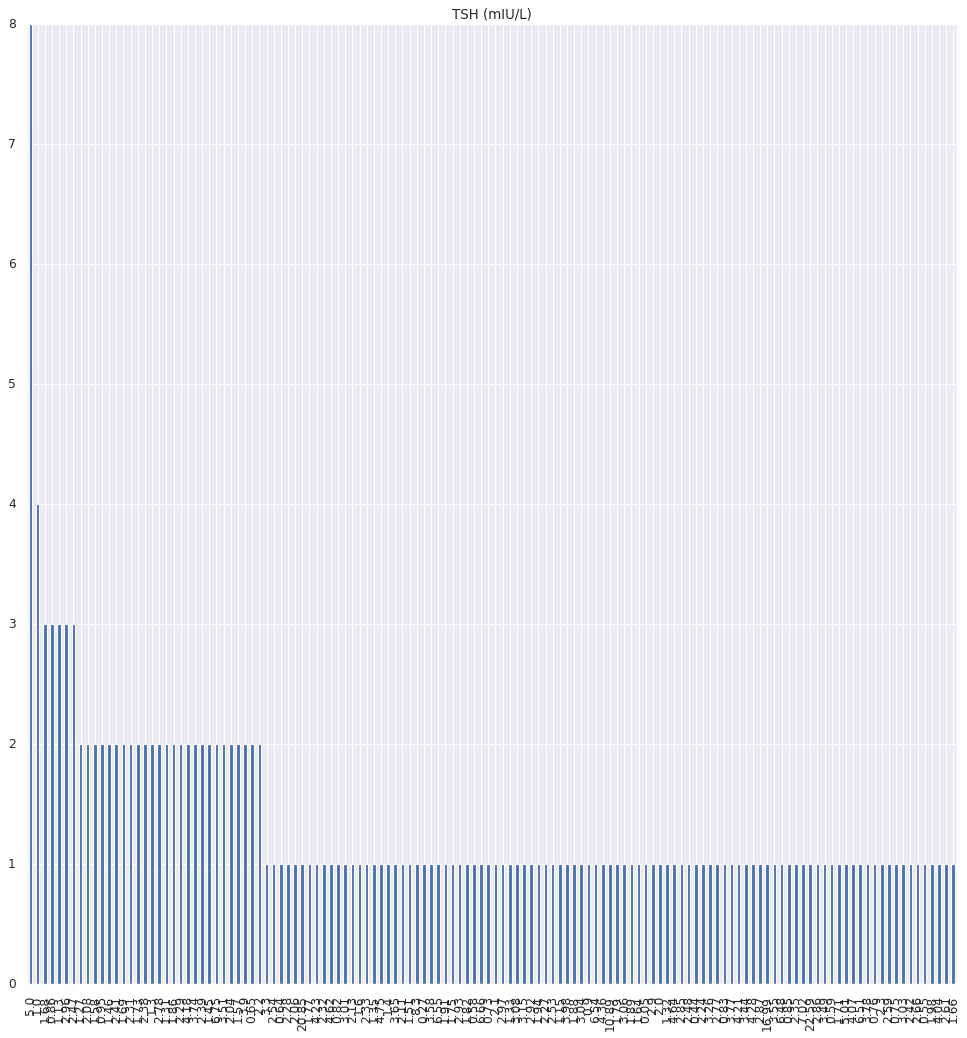

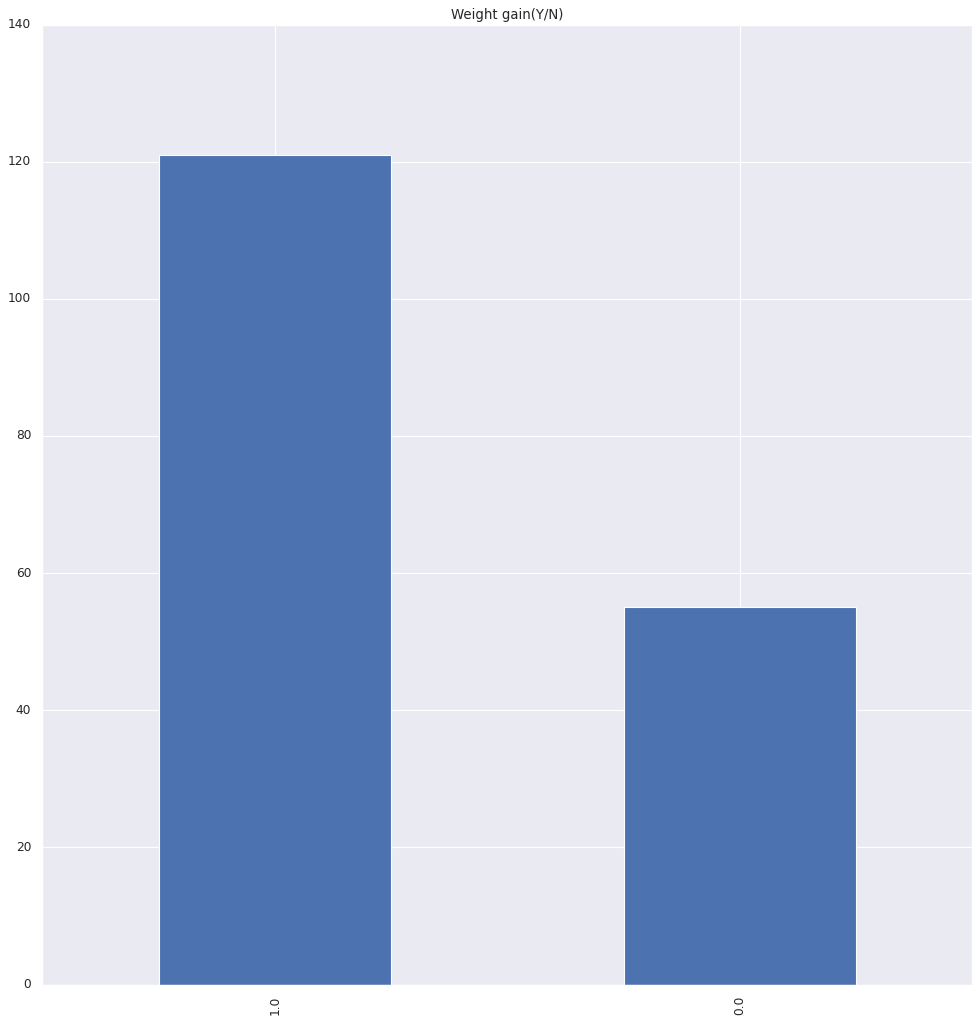

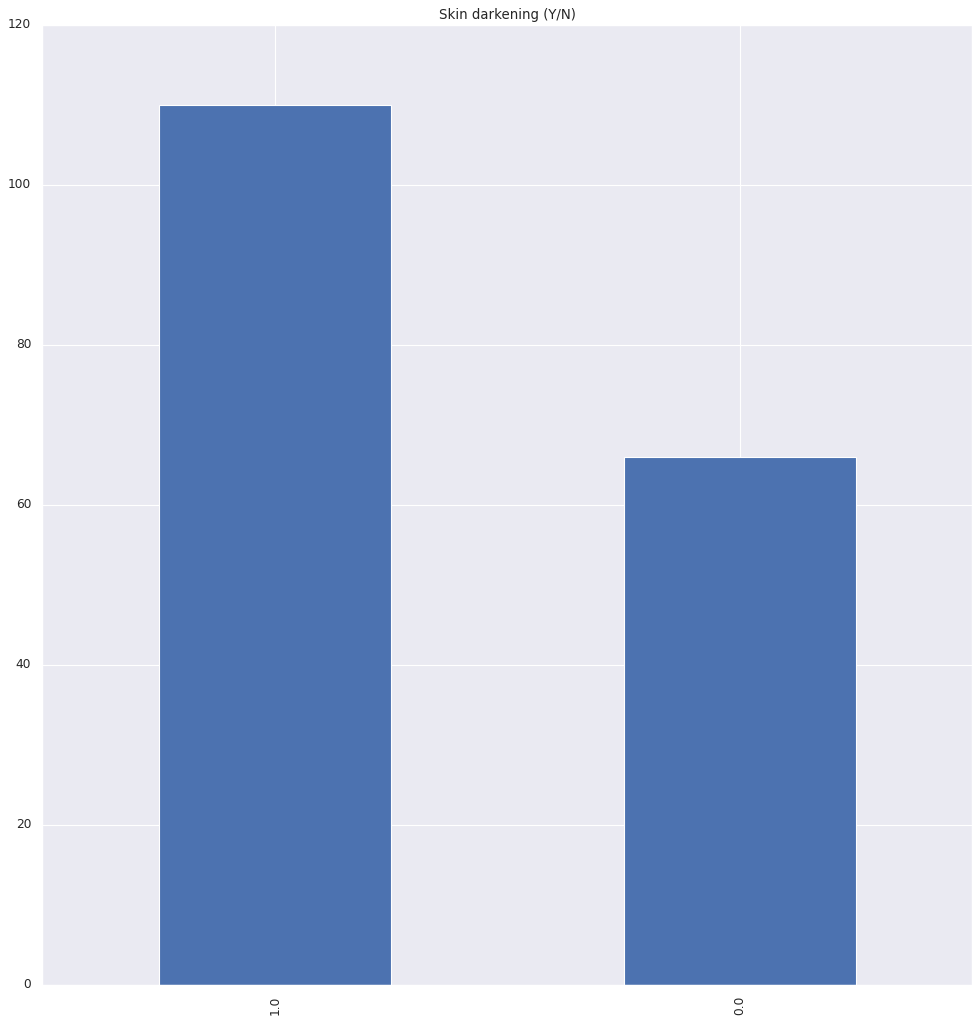

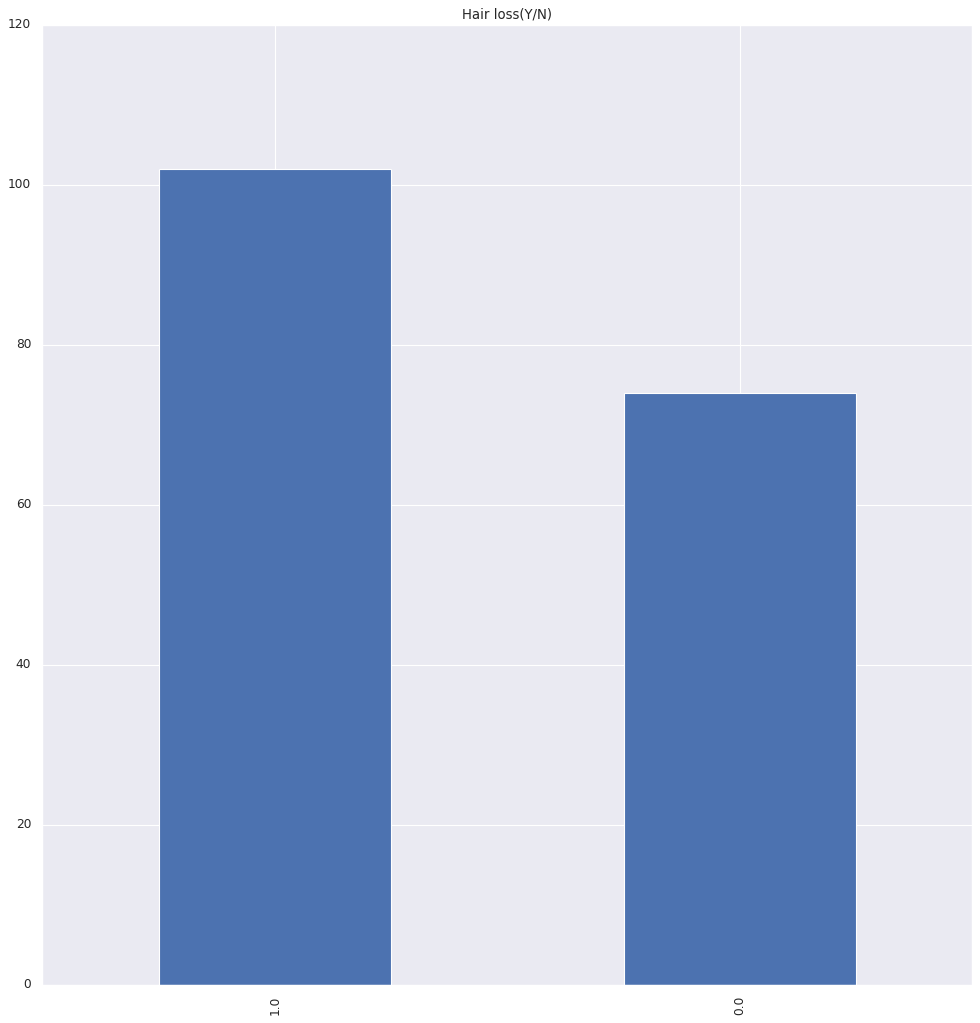

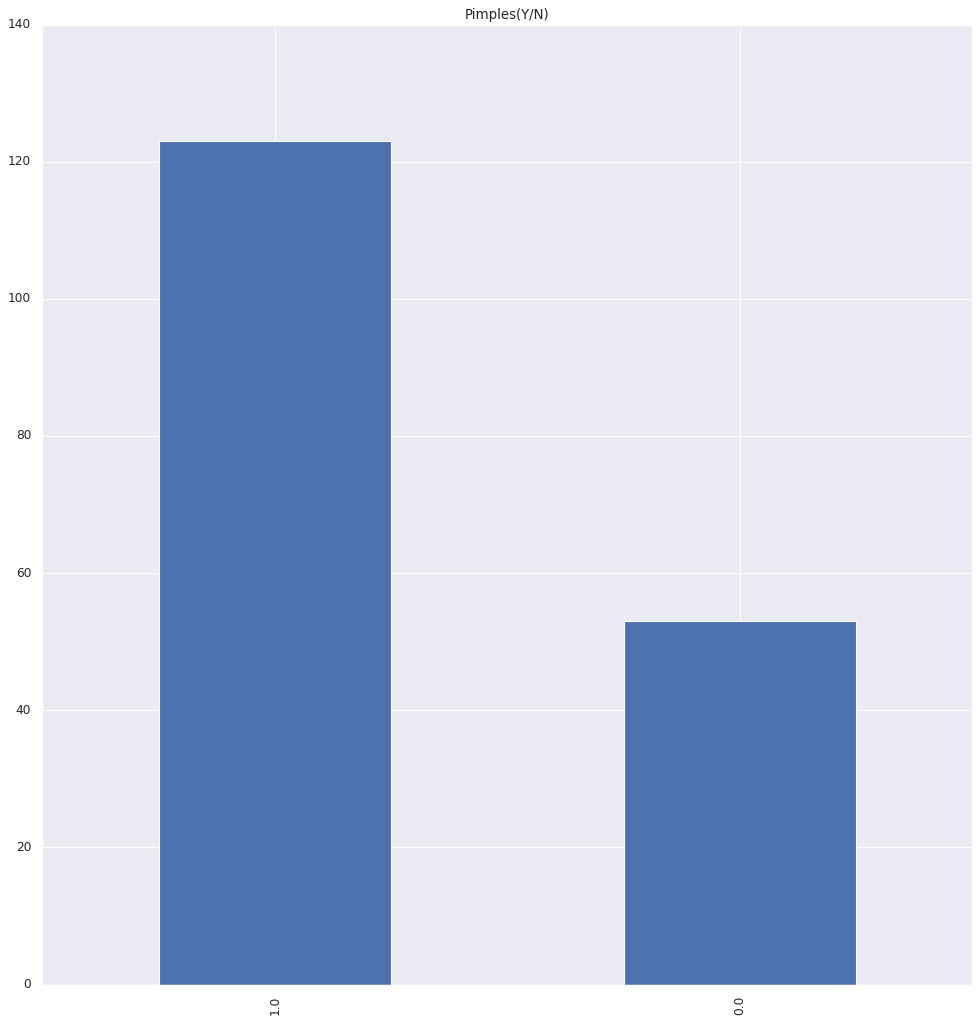

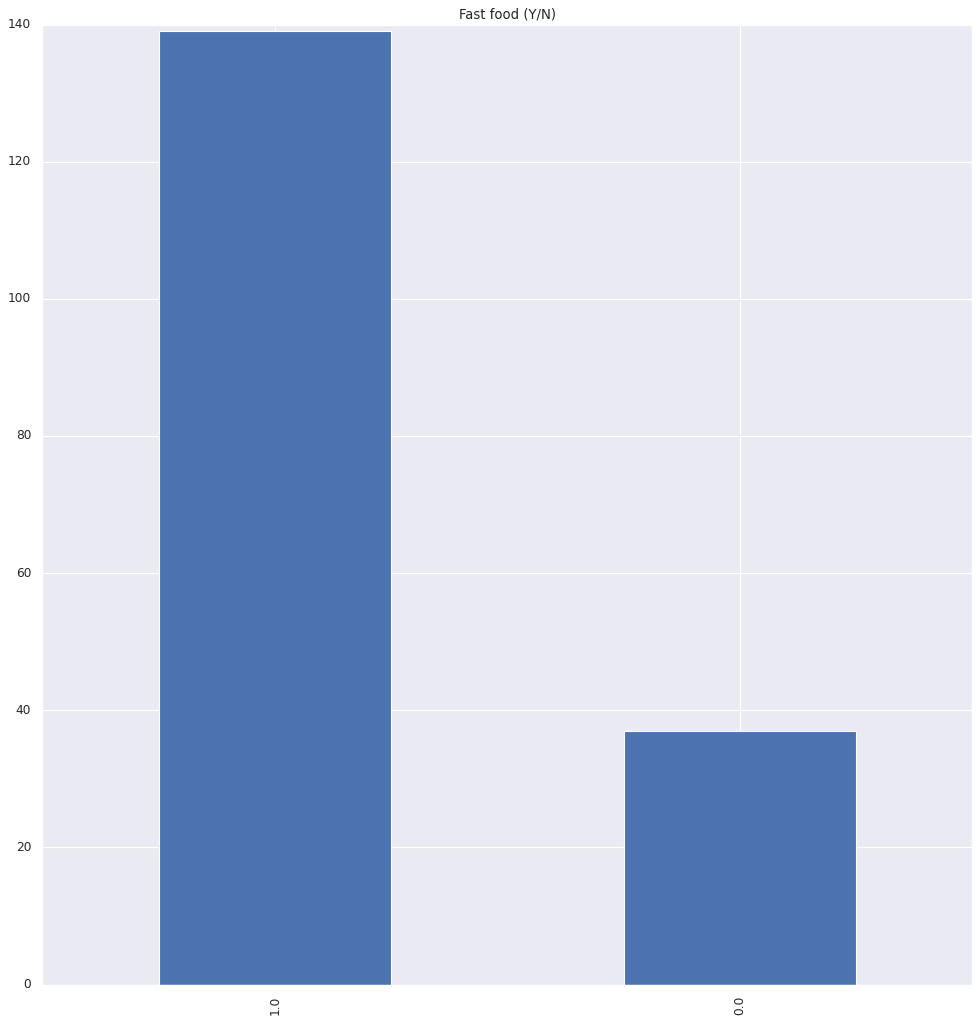

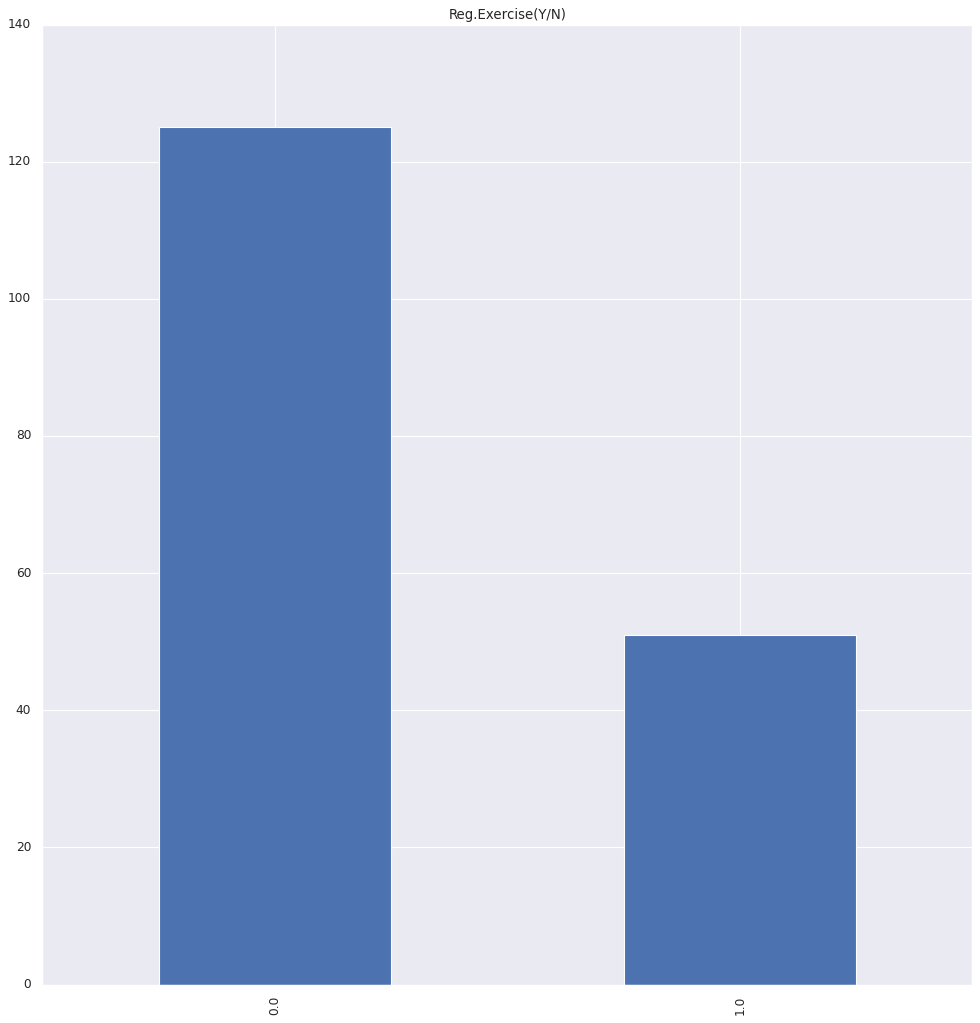

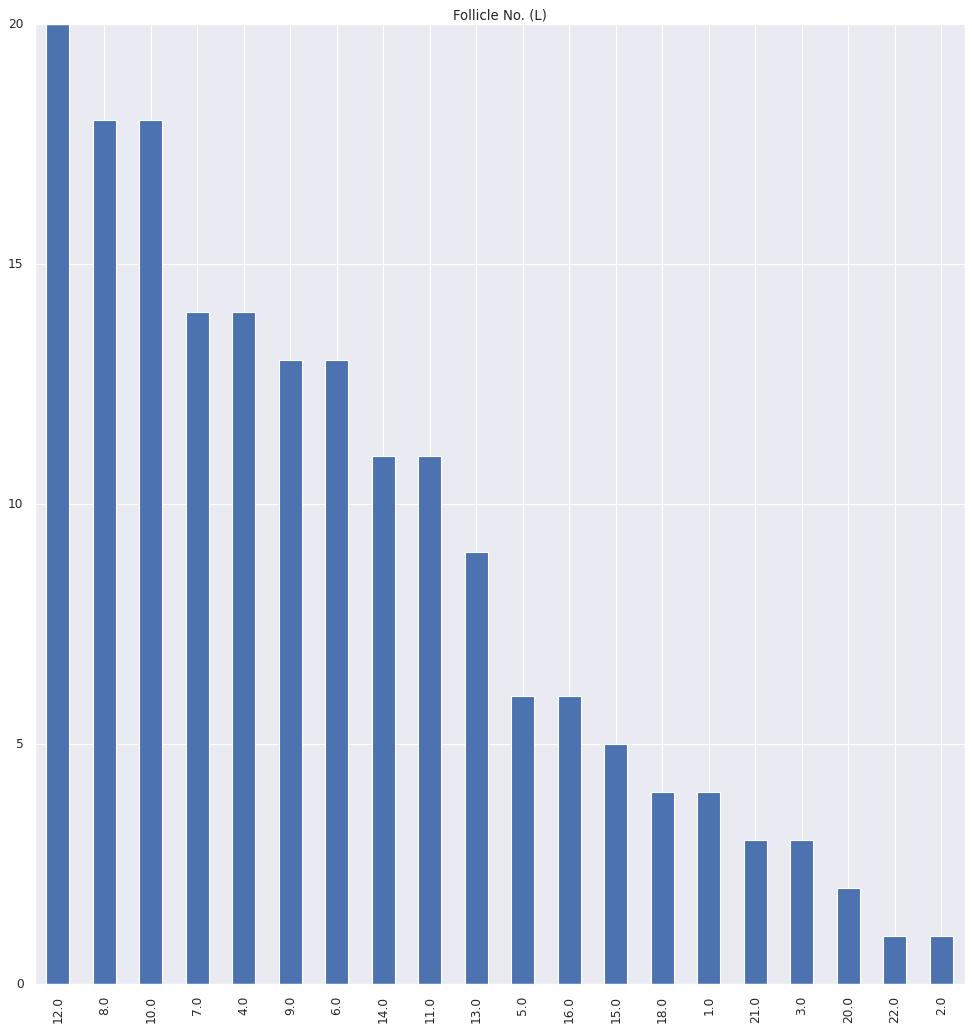

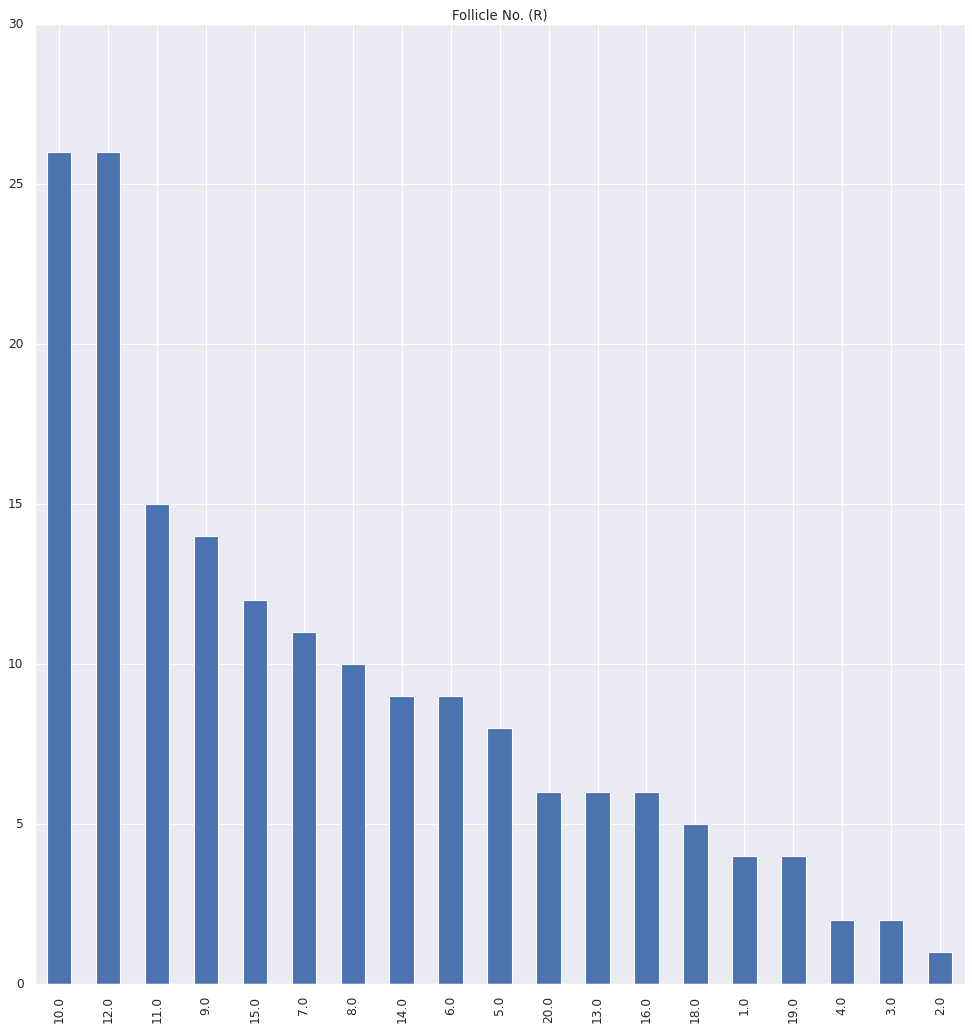

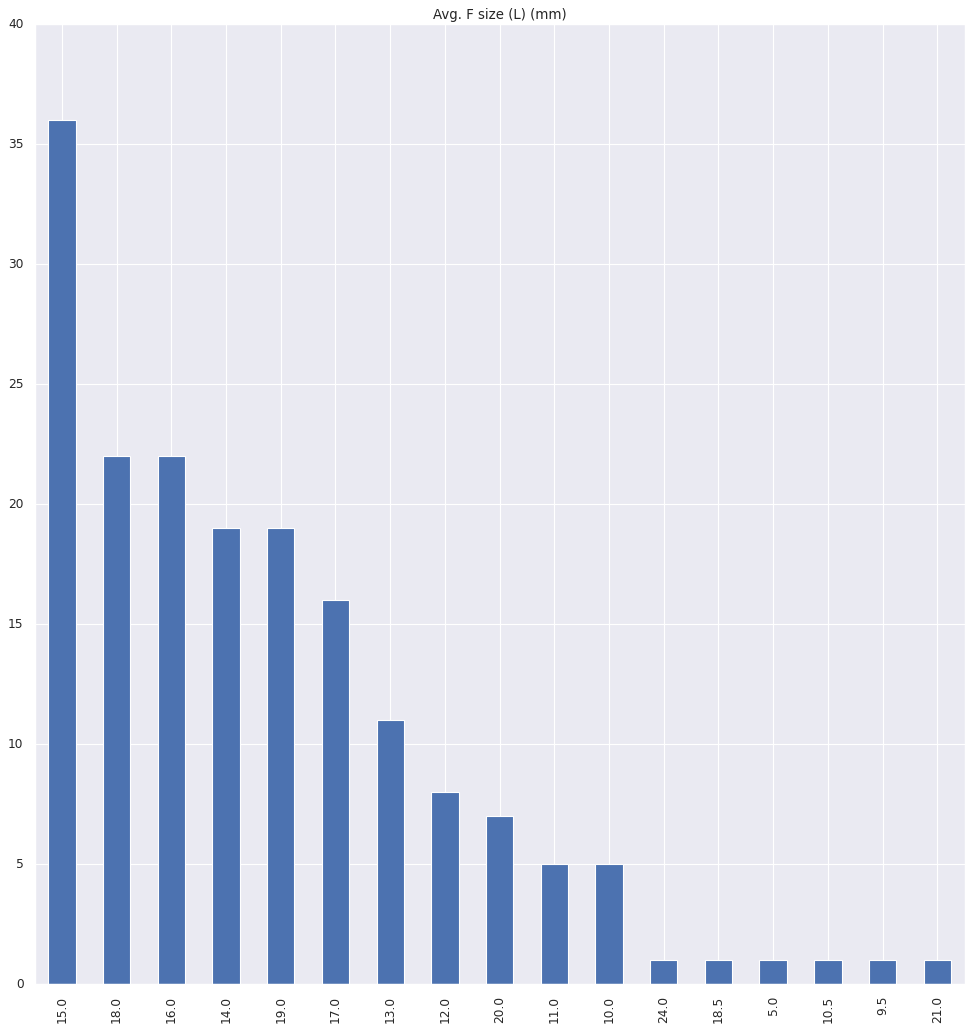

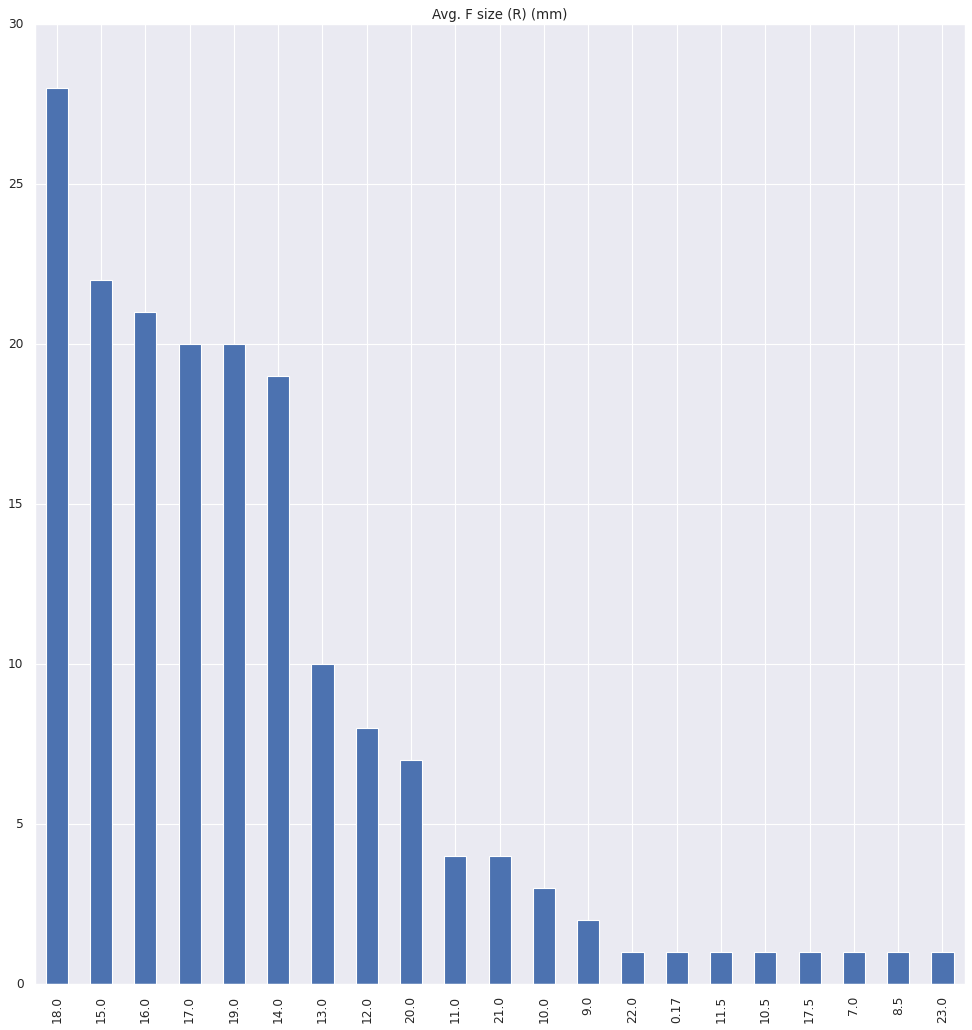

In [34]:
for i in [' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'Hb(g/dl)', 'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'Weight gain(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)']:
  sns.set(rc = {'figure.figsize':(15,15)})
  pcos[pcos['PCOS (Y/N)'] == 1][i].value_counts().plot.bar()
  plt.title(i)
  plt.show()

## 4.2 EDA using visuals


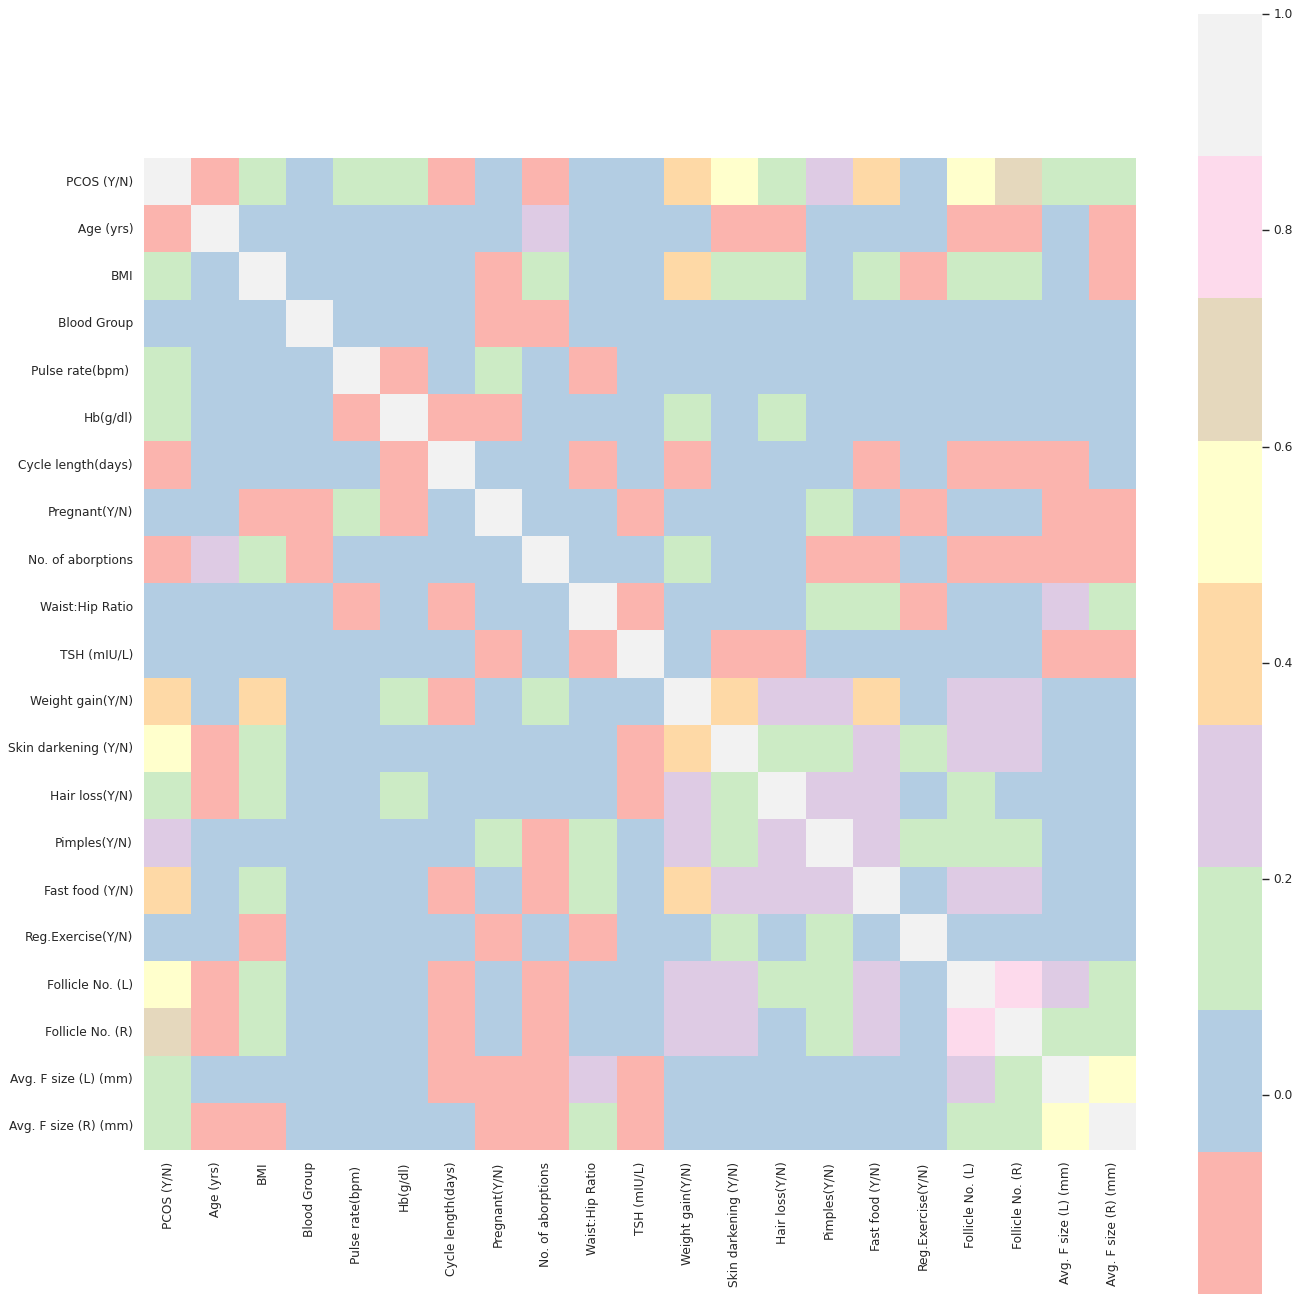

In [35]:
#correlation plot.

corrmat = pcos.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

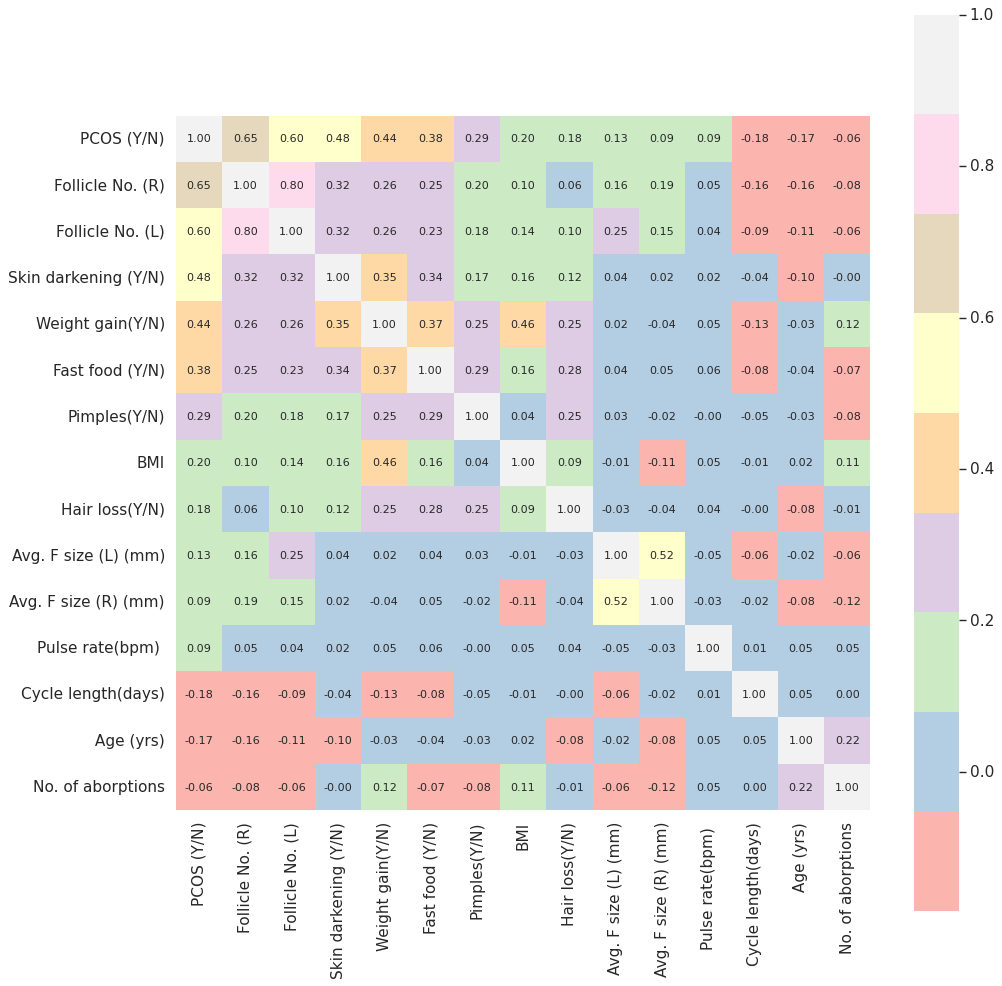

In [36]:
plt.figure(figsize=(14,14))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(pcos[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [37]:
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)              1.000000
Follicle No. (R)        0.651032
Follicle No. (L)        0.601445
Skin darkening (Y/N)    0.481768
Weight gain(Y/N)        0.443652
Fast food (Y/N)         0.381772
Pimples(Y/N)            0.288609
BMI                     0.198638
Hair loss(Y/N)          0.177458
Avg. F size (L) (mm)    0.129181
Avg. F size (R) (mm)    0.094268
Pulse rate(bpm)         0.092437
Hb(g/dl)                0.086934
Reg.Exercise(Y/N)       0.069481
Blood Group             0.034244
Waist:Hip Ratio         0.008387
TSH (mIU/L)            -0.009697
Pregnant(Y/N)          -0.026586
No. of aborptions      -0.056741
 Age (yrs)             -0.172436
Cycle length(days)     -0.183781
Name: PCOS (Y/N), dtype: float64

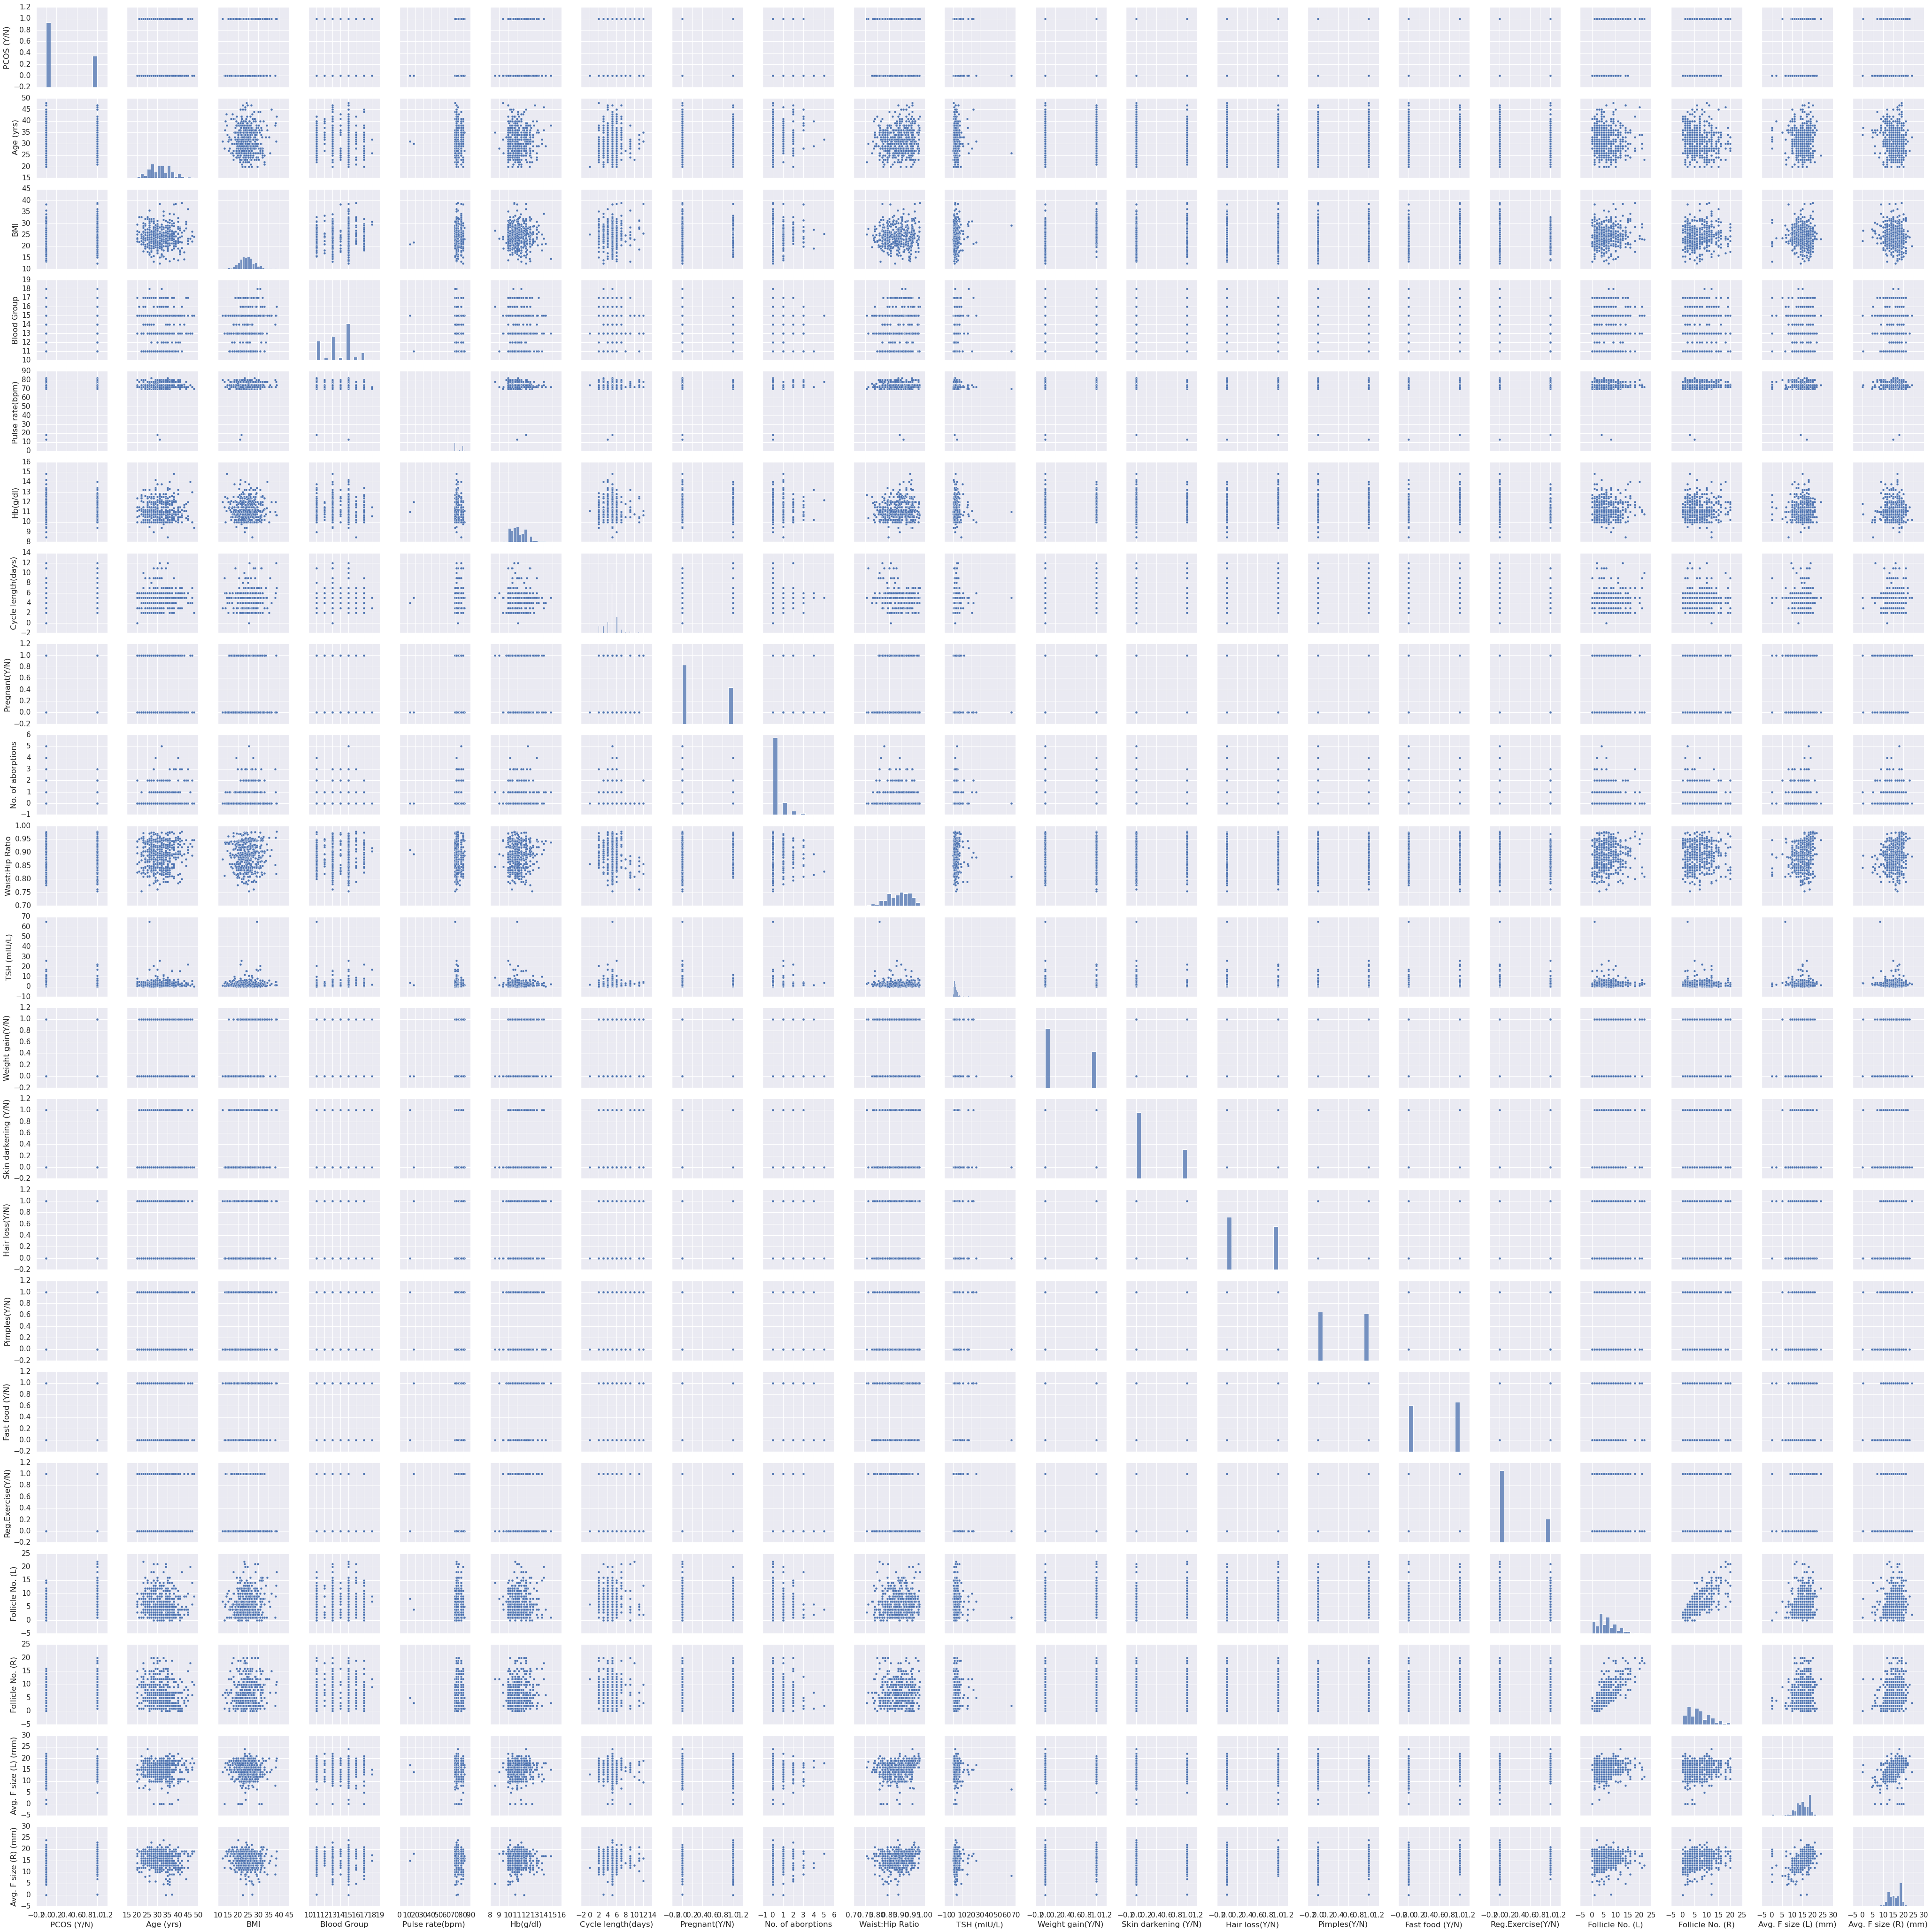

In [38]:
sns.pairplot(pcos)
plt.show()
plt.close()

In [39]:
pcos.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'Hb(g/dl)', 'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'Weight gain(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

# 5. Data Wrangling



## 5.1 Univariate Filters 

In [40]:
pcos.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'Hb(g/dl)', 'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'Weight gain(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

In [41]:
#Chi-Squared
def perform_chi2_test(data, col):
    # Create a contingency table for the column and the target variable
    contingency_table = pd.crosstab(data[col], data['PCOS (Y/N)'])
    
    # Perform the chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results
    print(f"Column: {col}")
    print(f"Chi-square statistic: {chi2_stat}")
    print(f"P-value: {p_val}")
    print(f"Degrees of freedom: {dof}")
    print(f"Expected frequencies: {expected}")
    print("\n")


In [42]:
#Chit-Squared
for col in pcos.columns:
    perform_chi2_test(pcos, col)

Column: PCOS (Y/N)
Chi-square statistic: 534.4622425996796
P-value: 3.0211435233027245e-118
Degrees of freedom: 1
Expected frequencies: [[244.46938776 118.53061224]
 [118.53061224  57.46938776]]


Column:  Age (yrs)
Chi-square statistic: 50.187955012043965
P-value: 0.006162111795792143
Degrees of freedom: 28
Expected frequencies: [[ 4.04081633  1.95918367]
 [ 2.02040816  0.97959184]
 [ 5.3877551   2.6122449 ]
 [12.12244898  5.87755102]
 [10.10204082  4.89795918]
 [12.12244898  5.87755102]
 [21.55102041 10.44897959]
 [22.89795918 11.10204082]
 [30.30612245 14.69387755]
 [22.89795918 11.10204082]
 [24.91836735 12.08163265]
 [22.2244898  10.7755102 ]
 [29.63265306 14.36734694]
 [16.83673469  8.16326531]
 [19.53061224  9.46938776]
 [24.91836735 12.08163265]
 [21.55102041 10.44897959]
 [10.10204082  4.89795918]
 [13.46938776  6.53061224]
 [ 6.06122449  2.93877551]
 [10.10204082  4.89795918]
 [ 6.06122449  2.93877551]
 [ 4.04081633  1.95918367]
 [ 2.02040816  0.97959184]
 [ 2.02040816  0.979

In [43]:
#Mutual Information(Information Gain)
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
X = pcos.drop(['PCOS (Y/N)'], axis=1)
y = pcos['PCOS (Y/N)']
mi = mutual_info_classif(X, y)
mi_pcos = pd.DataFrame({'feature': X.columns, 'mutual_information': mi})
mi_pcos = mi_pcos.sort_values('mutual_information', ascending=False)
print(mi_pcos)

                 feature  mutual_information
17      Follicle No. (R)            0.253470
16      Follicle No. (L)            0.219796
11  Skin darkening (Y/N)            0.103110
10      Weight gain(Y/N)            0.098219
5     Cycle length(days)            0.080714
14       Fast food (Y/N)            0.075181
8        Waist:Hip Ratio            0.061436
13          Pimples(Y/N)            0.032625
18  Avg. F size (L) (mm)            0.028499
9            TSH (mIU/L)            0.024537
7      No. of aborptions            0.021439
2            Blood Group            0.014075
1                    BMI            0.010012
0              Age (yrs)            0.008952
12        Hair loss(Y/N)            0.005042
15     Reg.Exercise(Y/N)            0.000000
6          Pregnant(Y/N)            0.000000
4               Hb(g/dl)            0.000000
3       Pulse rate(bpm)             0.000000
19  Avg. F size (R) (mm)            0.000000


## 5.2 Report observations


In Chi-Squared "Age" and "Waist:hip Ratio" have p-value less than assumed 0.05 which means null hypothesis is satisfied for these two columns alone.
In Mutual Inforamation Follicle No. (R) have the highest value and more information in feature for predicting the PCOS. Addition to this other factors in descending contributes tot he relationship.

# 6. Implement Machine Learning Techniques

## 6.1 ML technique 1 + Justification

In [44]:
#Classification -- Decision Tree classifier
# create model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.inspection import permutation_importance
x = pcos.drop('PCOS (Y/N)', axis=1)
y = pcos['PCOS (Y/N)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [45]:
dtc = DecisionTreeClassifier() 
dtc.fit(x_train, y_train) 
dtc_predicted_train = dtc.predict(x_train) 
dtc_predicted_test = dtc.predict(x_test) 
dtc_train_acc = accuracy_score(y_train, dtc_predicted_train) 
dtc_test_acc = accuracy_score(y_test, dtc_predicted_test) 
dtc_classification_report = classification_report(y_test, dtc_predicted_test)
dtc_confusion_matrix = confusion_matrix(y_test, dtc_predicted_test)

# print accuracy score, classification report, and confusion matrix
print(f"Training phase accuracy: {dtc_train_acc}")
print(f"Test phase accuracy: {dtc_test_acc}")
print(f"Classification Report : \n {dtc_classification_report}")
print(f"Confusion Matrix : \n{dtc_confusion_matrix}\n")

# consfusion matrix cross table
pd.crosstab(y_test, dtc_predicted_test, rownames=['True'], colnames=['Predicted'], margins=True)

Training phase accuracy: 1.0
Test phase accuracy: 0.8055555555555556
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87        80
         1.0       0.61      0.68      0.64        28

    accuracy                           0.81       108
   macro avg       0.75      0.76      0.76       108
weighted avg       0.81      0.81      0.81       108

Confusion Matrix : 
[[68 12]
 [ 9 19]]



Predicted,0.0,1.0,All
True,,,
0.0,68,12,80
1.0,9,19,28
All,77,31,108


## 6.2 ML technique 2 + Justification

In [46]:

#K-NN
knnc = KNeighborsClassifier() 
knnc.fit(x_train, y_train) 
knnc_predicted_train = knnc.predict(x_train) 
knnc_predicted_test = knnc.predict(x_test) 
knnc_train_acc = accuracy_score(y_train, knnc_predicted_train) 
knnc_test_acc = accuracy_score(y_test, knnc_predicted_test) 
knnc_classification_report = classification_report(y_test, knnc_predicted_test)
knnc_confusion_matrix = confusion_matrix(y_test, knnc_predicted_test)

# print accuracy score, classification report, and confusion matrix
print(f"Training phase accuracy: {knnc_train_acc}")
print(f"Test phase accuracy: {knnc_test_acc}")
print(f"Classification Report : \n {knnc_classification_report}")
print(f"Confusion Matrix : \n{knnc_confusion_matrix}\n")

# consfusion matrix cross table
pd.crosstab(y_test, knnc_predicted_test, rownames=['True'], colnames=['Predicted'], margins=True)

Training phase accuracy: 0.8955916473317865
Test phase accuracy: 0.8240740740740741
Classification Report : 
               precision    recall  f1-score   support

         0.0       0.86      0.91      0.88        80
         1.0       0.70      0.57      0.63        28

    accuracy                           0.82       108
   macro avg       0.78      0.74      0.76       108
weighted avg       0.82      0.82      0.82       108

Confusion Matrix : 
[[73  7]
 [12 16]]



Predicted,0.0,1.0,All
True,,,
0.0,73,7,80
1.0,12,16,28
All,85,23,108


## 7. Conclusion 


#ML1 Decision tree result explained
The decision tree model has been trained and tested on a dataset. The results obtained are as follows:

Training phase accuracy: 1.0 - This means that the decision tree algorithm was able to correctly classify all the instances in the training dataset. However, a perfect accuracy on the training dataset does not necessarily guarantee a good performance on unseen data.

Test phase accuracy: 0.7962962962962963 - This means that the decision tree model was able to correctly classify 79.63% of the instances in the test dataset. The test phase accuracy is a better measure of the performance of the model on unseen data.

Classification Report: The classification report shows various metrics such as precision, recall, and F1 score for each class (0 and 1) in the dataset. The precision for class 0 is 0.88, which means that when the model predicts a sample as class 0, it is correct 88% of the time. The recall for class 0 is 0.84, which means that the model is able to correctly identify 84% of the instances of class 0 in the dataset. The F1-score for class 0 is 0.86, which is the harmonic mean of precision and recall. Similarly, the precision, recall, and F1-score for class 1 are 0.59, 0.68, and 0.63, respectively.

Confusion Matrix: The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives predicted by the model. In this case, the confusion matrix shows that out of the 80 instances of class 0, the model correctly predicted 67 as class 0 and 13 as class 1. Out of the 28 instances of class 1, the model correctly predicted 19 as class 1 and 9 as class 0.

In summary, the decision tree model achieved a reasonable performance on the test dataset with an accuracy of 79.63%. However, the precision, recall, and F1-score for class 1 are relatively low compared to class 0, indicating that the model is not as good at identifying instances of class 1 as it is for class 0. The confusion matrix provides more detailed information about the performance of the model on each class.

#ML2 KNN results explained.

The KNN model has been trained and tested on a dataset. The results obtained are as follows:

Training phase accuracy: 0.8955916473317865 - This means that the KNN algorithm was able to correctly classify 89.56% of the instances in the training dataset.

Test phase accuracy: 0.8240740740740741 - This means that the KNN model was able to correctly classify 82.41% of the instances in the test dataset.

Classification Report: The classification report shows various metrics such as precision, recall, and F1 score for each class (0 and 1) in the dataset. The precision for class 0 is 0.86, which means that when the model predicts a sample as class 0, it is correct 86% of the time. The recall for class 0 is 0.91, which means that the model is able to correctly identify 91% of the instances of class 0 in the dataset. The F1-score for class 0 is 0.88, which is the harmonic mean of precision and recall. Similarly, the precision, recall, and F1-score for class 1 are 0.70, 0.57, and 0.63, respectively.

Confusion Matrix: The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives predicted by the model. In this case, the confusion matrix shows that out of the 80 instances of class 0, the model correctly predicted 73 as class 0 and 7 as class 1. Out of the 28 instances of class 1, the model correctly predicted 16 as class 1 and 12 as class 0.

In summary, the KNN model achieved a reasonable performance on the test dataset with an accuracy of 82.41%. The precision, recall, and F1-score for class 1 are relatively lower compared to class 0, indicating that the model is not as good at identifying instances of class 1 as it is for class 0. The confusion matrix provides more detailed information about the performance of the model on each class.

## 8. Solution
